In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
def validFiles(files):
    validFiles = []
    for file in files:
        if os.path.exists(file):
            validFiles.append(file)
    return validFiles

colorForSchemes = {
    "Static": "blue",
    "CMI": "green",
    "SI": "red",
    "NC": "orange",
}

# Read all Files

In [2]:
def getISScheme(studyTitle):
    return studyTitle.split('_')[0]

def getCTScheme(studyTitle):
    # remove everything before the first _ but keep the rest including "_"
    split = studyTitle.split('_')
    return '_'.join(split[1:])

# basic definitions
idleSlopeSchemes = ['Static', 'CMI', 'SI', 'NC']
crossTrafficSchemes = ['NoCT', 'NoCT_NoPCTRes', 'BECT', 'BECT_NoPCTRes', 'PCT']
studyTitles = []
for idleSlopeScheme in idleSlopeSchemes:
    for crossTrafficScheme in crossTrafficSchemes:
        if ((idleSlopeScheme == 'Static' and crossTrafficScheme == 'NoCT_NoPCTRes') 
            or (idleSlopeScheme == 'Static' and crossTrafficScheme == 'BECT_NoPCTRes')):
            continue
        studyTitles.append(idleSlopeScheme + '_' + crossTrafficScheme)
studyTitles

['Static_NoCT',
 'Static_BECT',
 'Static_PCT',
 'CMI_NoCT',
 'CMI_NoCT_NoPCTRes',
 'CMI_BECT',
 'CMI_BECT_NoPCTRes',
 'CMI_PCT',
 'SI_NoCT',
 'SI_NoCT_NoPCTRes',
 'SI_BECT',
 'SI_BECT_NoPCTRes',
 'SI_PCT',
 'NC_NoCT',
 'NC_NoCT_NoPCTRes',
 'NC_BECT',
 'NC_BECT_NoPCTRes',
 'NC_PCT']

## Read Simulation Results (Subdir sim/)
Open the Study as an anf-File and select the relevant data in OMNeT++ IDE.
Right click and select "Export Data" -> "JSON" -> Select Use NumPy arrays, and other settings specified below.

Studies are formed for all IdleSlope schemes:
- Static
- CMI 
- Stream Interval (SI)
- Network Calculus (NC) -- from DYRECTsn Framework

For all schemes the following permutations are executed:
- NoCT
- NoCT_NoPCTRes (not for static scheme, as it is not applicable)
- BECT
- BECT_NoPCTRes (not for static scheme, as it is not applicable)
- PCT

The %STUDY% is formed by the scheme and the permutation, e.g. `Static_NoCT` or `SI_BECT_NoPCTRes`.

Table for the settings, all results are Vectors
| Module Filter | Result Name | Target File | Start Time | End Time |
|---------------|-------------|-------------|------------|----------|
| `**.aggregateSwitch.etherMAC[0].**.transmissionSelectionAlgorithm[7]` | reservedBandwidth:vector | `sim/%STUDY%_AggregateIdleSlopes.json` | 0s | 0.2s |
| `**.stageSwitch[*].etherMAC[1].**.transmissionSelectionAlgorithm[7]` | reservedBandwidth:vector | `sim/%STUDY%_StageIdleSlopes.json` | 0s | 0.2s |
| `**.sink.middleware.subscriberEndpoints[*]` | endpointCreatedAt:sum (scalar!) | `sim/%STUDY%_SinkCreated.json` | 0s | 0.2s |
| `**.talkerSrc[*].middleware.publisherEndpoints[*]` | endpointCreatedAt:sum (scalar!) | `sim/%STUDY%_TalkerCreated.json` | 0s | 0.2s |
| `**.talkerSrc[*].middleware.publisherEndpoints[*]` | connectedRemotes:vector | `sim/%STUDY%_TalkerRemotes.json` | 0s | 0.2s |
| `**.aggregateSwitch.etherMAC[0].**.queue[7]` | delay:vector | `sim/%STUDY%_AggregateDelay.json` | 0.1s | 0.3s |
| `**.aggregateSwitch.etherMAC[0].**.queue[7]` | length:vector | `sim/%STUDY%_AggregateQueue.json` | 0.1s | 0.3s |
| `**.sink.services[*]` | rxLatency:vector | `sim/%STUDY%_SinkDelay.json` | 0.1s | 0.3s |


In [3]:
def buildSimFileName(studyTitle, valueName):
    return 'simScave/' + studyTitle + "_" + valueName + '.json'

def getValueNameFromSimFileName(simFileName):
    split = simFileName.split('/')[-1].split('.')[0].split('_')
    return split[-1]

def getStudyTitleFromSimFileName(simFileName):
    split = simFileName.split('/')[-1].split('.')[0].split('_')
    return '_'.join(split[:-1])


In [43]:
simAggregateSlopeFiles = []
simStageSlopeFiles = []
simNCStageSlopeFiles = []
simSubCreatedFiles = []
simPubCreatedFiles = []
simPubRemotesFiles = []
simQueueFiles = []
simDelayFiles = []
simSinkDelayFiles = []
for studyTitle in studyTitles:
    simAggregateSlopeFiles.append(buildSimFileName(studyTitle, 'AggregateIdleSlopes'))
    simStageSlopeFiles.append(buildSimFileName(studyTitle, 'StageIdleSlopes'))
    simSubCreatedFiles.append(buildSimFileName(studyTitle, 'SinkCreated'))
    simPubCreatedFiles.append(buildSimFileName(studyTitle, 'TalkerCreated'))
    simPubRemotesFiles.append(buildSimFileName(studyTitle, 'TalkerRemotes'))
    simQueueFiles.append(buildSimFileName(studyTitle, 'AggregateQueue'))
    simDelayFiles.append(buildSimFileName(studyTitle, 'AggregateDelay'))
    simSinkDelayFiles.append(buildSimFileName(studyTitle, 'SinkDelay'))
    if "NC" in studyTitle:
        simNCStageSlopeFiles.append(buildSimFileName(studyTitle, 'StageIdleSlopes'))

# check if the files exist and remove the ones that do not from the list
simAggregateSlopeFiles = validFiles(simAggregateSlopeFiles)
simStageSlopeFiles = validFiles(simStageSlopeFiles)
simNCStageSlopeFiles = validFiles(simNCStageSlopeFiles)
simSubCreatedFiles = validFiles(simSubCreatedFiles)
simPubCreatedFiles = validFiles(simPubCreatedFiles)
simPubRemotesFiles = validFiles(simPubRemotesFiles)
simQueueFiles = validFiles(simQueueFiles)
simDelayFiles = validFiles(simDelayFiles)
simSinkDelayFiles = validFiles(simSinkDelayFiles)

print ("valid sim files found:")
print (simAggregateSlopeFiles)
print (simStageSlopeFiles)
print (simNCStageSlopeFiles)
print (simSubCreatedFiles)
print (simPubCreatedFiles)
print (simPubRemotesFiles)
print (simQueueFiles)
print (simDelayFiles)
print (simSinkDelayFiles)

valid sim files found:
['simScave/CMI_NoCT_AggregateIdleSlopes.json', 'simScave/CMI_BECT_AggregateIdleSlopes.json', 'simScave/CMI_PCT_AggregateIdleSlopes.json', 'simScave/SI_NoCT_AggregateIdleSlopes.json', 'simScave/SI_BECT_AggregateIdleSlopes.json', 'simScave/SI_PCT_AggregateIdleSlopes.json', 'simScave/NC_NoCT_AggregateIdleSlopes.json', 'simScave/NC_BECT_AggregateIdleSlopes.json', 'simScave/NC_PCT_AggregateIdleSlopes.json']
['simScave/CMI_NoCT_StageIdleSlopes.json', 'simScave/CMI_BECT_StageIdleSlopes.json', 'simScave/CMI_PCT_StageIdleSlopes.json', 'simScave/SI_NoCT_StageIdleSlopes.json', 'simScave/SI_BECT_StageIdleSlopes.json', 'simScave/SI_PCT_StageIdleSlopes.json', 'simScave/NC_NoCT_StageIdleSlopes.json', 'simScave/NC_BECT_StageIdleSlopes.json', 'simScave/NC_PCT_StageIdleSlopes.json']
['simScave/NC_NoCT_StageIdleSlopes.json', 'simScave/NC_BECT_StageIdleSlopes.json', 'simScave/NC_PCT_StageIdleSlopes.json']
['simScave/CMI_NoCT_SinkCreated.json', 'simScave/CMI_BECT_SinkCreated.json', '

### Reserverd Bandwidth for Aggregate and Stage Switches

In [5]:
def getMaxIdleSlopesForSimStudy(simFile, returnFirst=False):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        maxIdleSlope = 0
        for vector in sim[study]["vectors"]:
            if "reservedBandwidth" in vector["name"]:
                maxIdleSlope = np.max([np.max(vector["value"]),maxIdleSlope])
                if returnFirst:
                    break
        results[(inputLinks,stages)] = int(maxIdleSlope)
    return results

def getMinIdleSlopesForSimStudy(simFile, returnFirst=False):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        minIdleSlope = 1000000000 # gigabit max slope
        for vector in sim[study]["vectors"]:
            if "reservedBandwidth" in vector["name"]:
                minIdleSlope = np.min([np.max(vector["value"]),minIdleSlope]) ## take the max of each run but the min of all runs
                if returnFirst:
                    break
        results[(inputLinks,stages)] = int(minIdleSlope)
    return results

def getAvgIdleSlopesForSimStudy(simFile):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        sumIdleSlope = 0 
        values = 0
        for vector in sim[study]["vectors"]:
            if "reservedBandwidth" in vector["name"]:
                sumIdleSlope += np.max(vector["value"]) ## take the max of each run but the min of all runs
                values += 1
        avgIdleSlope = int(sumIdleSlope/values)
        results[(inputLinks,stages)] = avgIdleSlope
    return results

def getAllIdleSlopesForSimStudy(simFile):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        idleSlopes = dict()
        for vector in sim[study]["vectors"]:
            if "reservedBandwidth" in vector["name"]:
                module = vector["module"]
                stage = int(module.split(".")[2].split("[")[-1].replace("]",""))
                idleSlopes[stage] = int(np.max(vector["value"]))
        results[(inputLinks,stages)] = idleSlopes
    return results

def getSlopesForStudyFiles(simFiles, operator="first"):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        if operator == "first":
            results[isScheme][ctScheme] = getMaxIdleSlopesForSimStudy(simFile, True)
        elif operator == "max":
            results[isScheme][ctScheme] = getMaxIdleSlopesForSimStudy(simFile, False)
        elif operator == "min":
            results[isScheme][ctScheme] = getMinIdleSlopesForSimStudy(simFile, False)
        elif operator == "avg":
            results[isScheme][ctScheme] = getAvgIdleSlopesForSimStudy(simFile)
        elif operator == "all":
            results[isScheme][ctScheme] = getAllIdleSlopesForSimStudy(simFile)
    return results


In [46]:
def mergeTwoResultDicts(dict1, dict2):
    for isScheme in dict2:
        if isScheme not in dict1:
            dict1[isScheme] = dict2[isScheme]
        else:
            for ctScheme in dict2[isScheme]:
                if ctScheme not in dict1[isScheme]:
                    dict1[isScheme][ctScheme] = dict2[isScheme][ctScheme]
                else:
                    for key in dict2[isScheme][ctScheme]:
                        dict1[isScheme][ctScheme][key] = dict2[isScheme][ctScheme][key]
    return dict1

In [47]:
# simAggregateIdleSlopes =  getSlopesForStudyFiles(simAggregateSlopeFiles, "first")
simAggregateIdleSlopes = mergeTwoResultDicts(simAggregateIdleSlopes, getSlopesForStudyFiles(simAggregateSlopeFiles, "first"))
print(simAggregateIdleSlopes)

{'Static': {'NoCT': {(10, 1): 75000000, (10, 10): 75000000, (10, 2): 75000000, (10, 3): 75000000, (10, 4): 75000000, (10, 5): 75000000, (10, 8): 75000000, (10, 9): 75000000, (10, 6): 75000000, (10, 7): 75000000, (11, 1): 75000000, (11, 10): 75000000, (11, 2): 75000000, (11, 3): 75000000, (11, 6): 75000000, (11, 7): 75000000, (11, 4): 75000000, (11, 5): 75000000, (11, 8): 75000000, (11, 9): 75000000, (12, 10): 75000000, (12, 1): 75000000, (12, 2): 75000000, (12, 3): 75000000, (12, 4): 75000000, (12, 6): 75000000, (12, 7): 75000000, (12, 5): 75000000, (12, 8): 75000000, (12, 9): 75000000, (13, 10): 75000000, (13, 1): 75000000, (13, 2): 75000000, (13, 3): 75000000, (13, 4): 75000000, (13, 6): 75000000, (13, 7): 75000000, (13, 5): 75000000, (2, 2): 75000000, (2, 5): 75000000, (2, 3): 75000000, (2, 8): 75000000, (2, 9): 75000000, (2, 4): 75000000, (13, 8): 75000000, (13, 9): 75000000, (2, 1): 75000000, (2, 10): 75000000, (2, 6): 75000000, (2, 7): 75000000, (3, 2): 75000000, (3, 3): 75000000

In [115]:
isScheme = "NC"
minNcAggregateIdleSlope = 1000000000
maxNcAggregateIdleSlope = 0
avgNcAggregateIdleSlope = 0
numSlopes = 0
for ctScheme in simAggregateIdleSlopes[isScheme]:
    for key in simAggregateIdleSlopes[isScheme][ctScheme]:
        if key[1] > 15:
            continue
        minNcAggregateIdleSlope = np.min([minNcAggregateIdleSlope, simAggregateIdleSlopes[isScheme][ctScheme][key]])
        maxNcAggregateIdleSlope = np.max([maxNcAggregateIdleSlope, simAggregateIdleSlopes[isScheme][ctScheme][key]])
        avgNcAggregateIdleSlope += simAggregateIdleSlopes[isScheme][ctScheme][key]
        numSlopes += 1
avgNcAggregateIdleSlope = int(avgNcAggregateIdleSlope/numSlopes)
print("NC min aggregate slope: ", minNcAggregateIdleSlope)
print("NC max aggregate slope: ", maxNcAggregateIdleSlope)
print("NC avg aggregate slope: ", avgNcAggregateIdleSlope)

NC min aggregate slope:  74496000
NC max aggregate slope:  75563174
NC avg aggregate slope:  74826351


In [48]:
# simMaxStageIdleSlopes = getSlopesForStudyFiles(simStageSlopeFiles, "max")
simMaxStageIdleSlopes = mergeTwoResultDicts(simMaxStageIdleSlopes, getSlopesForStudyFiles(simStageSlopeFiles, "max"))
# simMinStageIdleSlopes = getSlopesForStudyFiles(simStageSlopeFiles, "min")
simMaxStageIdleSlopes = mergeTwoResultDicts(simMinStageIdleSlopes, getSlopesForStudyFiles(simStageSlopeFiles, "min"))
# simAvgStageIdleSlopes = getSlopesForStudyFiles(simStageSlopeFiles, "avg")
simMaxStageIdleSlopes = mergeTwoResultDicts(simAvgStageIdleSlopes, getSlopesForStudyFiles(simStageSlopeFiles, "avg"))
print(simMaxStageIdleSlopes)
print(simMinStageIdleSlopes)
print(simAvgStageIdleSlopes)

{'Static': {'NoCT': {(10, 1): 75000000, (10, 10): 75000000, (10, 2): 75000000, (10, 3): 75000000, (10, 4): 75000000, (10, 5): 75000000, (10, 8): 75000000, (10, 9): 75000000, (10, 6): 75000000, (10, 7): 75000000, (11, 1): 75000000, (11, 10): 75000000, (11, 2): 75000000, (11, 3): 75000000, (11, 6): 75000000, (11, 7): 75000000, (11, 4): 75000000, (11, 5): 75000000, (11, 8): 75000000, (11, 9): 75000000, (12, 10): 75000000, (12, 1): 75000000, (12, 2): 75000000, (12, 3): 75000000, (12, 4): 75000000, (12, 6): 75000000, (12, 7): 75000000, (12, 5): 75000000, (12, 8): 75000000, (12, 9): 75000000, (13, 10): 75000000, (13, 1): 75000000, (13, 2): 75000000, (13, 3): 75000000, (13, 4): 75000000, (13, 6): 75000000, (13, 7): 75000000, (13, 5): 75000000, (2, 2): 75000000, (2, 5): 75000000, (2, 3): 75000000, (2, 8): 75000000, (2, 9): 75000000, (2, 4): 75000000, (13, 8): 75000000, (13, 9): 75000000, (2, 1): 75000000, (2, 10): 75000000, (2, 6): 75000000, (2, 7): 75000000, (3, 2): 75000000, (3, 3): 75000000

In [49]:
# simNcStageIdleSlopes = getSlopesForStudyFiles(simNCStageSlopeFiles, "all")
simNcStageIdleSlopes = mergeTwoResultDicts(simNcStageIdleSlopes, getSlopesForStudyFiles(simNCStageSlopeFiles, "all"))
print(simNcStageIdleSlopes)

{'NC': {'NoCT': {(10, 1): {0: 66227733}, (10, 10): {0: 66227733, 1: 54814654, 2: 54245325, 3: 53661465, 4: 53062511, 5: 52447872, 6: 51816921, 7: 51169002, 8: 50503420, 9: 49819443}, (10, 2): {0: 66227733, 1: 49819443}, (10, 3): {0: 66227733, 1: 50503420, 2: 49819443}, (10, 4): {0: 66227733, 1: 51169002, 2: 50503420, 3: 49819443}, (10, 6): {0: 66227733, 1: 52447872, 2: 51816921, 3: 51169002, 4: 50503420, 5: 49819443}, (10, 5): {0: 66227733, 1: 51816921, 2: 51169002, 3: 50503420, 4: 49819443}, (10, 9): {0: 66227733, 1: 54245325, 2: 53661465, 3: 53062511, 4: 52447872, 5: 51816921, 6: 51169002, 7: 50503420, 8: 49819443}, (11, 1): {0: 65047443}, (10, 7): {0: 66227733, 1: 53062511, 2: 52447872, 3: 51816921, 4: 51169002, 5: 50503420, 6: 49819443}, (10, 8): {0: 66227733, 1: 53661465, 2: 53062511, 3: 52447872, 4: 51816921, 5: 51169002, 6: 50503420, 7: 49819443}, (11, 10): {0: 65047443, 1: 55308266, 2: 54739982, 3: 54157060, 4: 53558926, 5: 52944978, 6: 52314579, 7: 51667061, 8: 51001715, 9: 50

### Aggregate Switch Max Queue Length

In [9]:
def getMaxQueueForSimStudy(simFile, returnFirst=True):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        maxQueue = 0
        for vector in sim[study]["vectors"]:
            if "length" in vector["name"]:
                maxQueue = np.max([np.max(vector["value"]),maxQueue])
                if returnFirst:
                    break
        results[(inputLinks,stages)] = maxQueue
    return results

def getMaxQueueForStudyFiles(simFiles, returnFirst=True):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getMaxQueueForSimStudy(simFile, returnFirst)
    return results

In [10]:
simAggregateQueues = getMaxQueueForStudyFiles(simQueueFiles, returnFirst=True)
print(simAggregateQueues)

{'Static': {'NoCT': {(10, 1): np.int64(9), (10, 10): np.int64(9), (10, 2): np.int64(9), (10, 3): np.int64(9), (10, 4): np.int64(9), (10, 5): np.int64(9), (10, 8): np.int64(9), (10, 9): np.int64(9), (10, 6): np.int64(9), (10, 7): np.int64(9), (11, 1): np.int64(11), (11, 10): np.int64(10), (11, 2): np.int64(10), (11, 3): np.int64(10), (11, 6): np.int64(10), (11, 7): np.int64(10), (11, 4): np.int64(10), (11, 5): np.int64(10), (11, 8): np.int64(10), (11, 9): np.int64(10), (12, 10): np.int64(11), (12, 1): np.int64(11), (12, 2): np.int64(11), (12, 3): np.int64(12), (12, 4): np.int64(11), (12, 6): np.int64(11), (12, 7): np.int64(11), (12, 5): np.int64(11), (12, 8): np.int64(11), (12, 9): np.int64(11), (13, 10): np.int64(12), (13, 1): np.int64(12), (13, 2): np.int64(12), (13, 3): np.int64(12), (13, 4): np.int64(12), (13, 6): np.int64(13), (13, 7): np.int64(12), (13, 5): np.int64(12), (2, 2): np.int64(1), (2, 5): np.int64(1), (2, 3): np.int64(1), (2, 8): np.int64(1), (2, 9): np.int64(1), (2, 4)

### Aggregate Switch Max Queue Delay

In [11]:
def getMaxDelayForSimStudy(simFile, returnFirst=True):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        maxDelay = 0
        for vector in sim[study]["vectors"]:
            if "delay" in vector["name"]:
                maxDelay = np.max([np.max(vector["value"]),maxDelay])
                if returnFirst:
                    break
        results[(inputLinks,stages)] = maxDelay
    return results

def getMaxDelayForStudyFiles(simFiles, returnFirst=True):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getMaxDelayForSimStudy(simFile, returnFirst)
    return results

In [54]:
# simAggregateDelays = getMaxDelayForStudyFiles(simDelayFiles, returnFirst=False)
simAggregateDelays = mergeTwoResultDicts(simAggregateDelays, getMaxDelayForStudyFiles(simSinkDelayFiles, returnFirst=False))
print(simAggregateDelays)

{'Static': {'NoCT': {(10, 1): np.float64(0.00010782000000000001), (10, 10): np.float64(0.00010832), (10, 2): np.float64(0.00010782000000000001), (10, 3): np.float64(0.00010782000000000001), (10, 4): np.float64(0.00010782000000000001), (10, 5): np.float64(0.00010782000000000001), (10, 8): np.float64(0.00010782000000000001), (10, 9): np.float64(0.00010782000000000001), (10, 6): np.float64(0.00010782000000000001), (10, 7): np.float64(0.00010782000000000001), (11, 1): np.float64(0.00010813), (11, 10): np.float64(0.00010812), (11, 2): np.float64(0.00010812500000000001), (11, 3): np.float64(0.00010812), (11, 6): np.float64(0.00010812), (11, 7): np.float64(0.00010816000000000001), (11, 4): np.float64(0.00010812), (11, 5): np.float64(0.00010812), (11, 8): np.float64(0.00010812), (11, 9): np.float64(0.00010812), (12, 10): np.float64(0.00010834), (12, 1): np.float64(0.00010834), (12, 2): np.float64(0.00010834), (12, 3): np.float64(0.00010834), (12, 4): np.float64(0.00010834), (12, 6): np.float64

### Sink Delay

In [13]:
def getMaxDelayForSimStudy(simFile, returnFirst=True):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        maxDelay = 0
        for vector in sim[study]["vectors"]:
            if "rxLatency" in vector["name"]:
                maxDelay = np.max([np.max(vector["value"]),maxDelay])
                if returnFirst:
                    break
        results[(inputLinks,stages)] = maxDelay
    return results

def getMaxDelayForStudyFiles(simFiles, returnFirst=True):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getMaxDelayForSimStudy(simFile, returnFirst)
    return results

In [55]:
# simSinkDelays = getMaxDelayForStudyFiles(simSinkDelayFiles, returnFirst=False)
simSinkDelays = mergeTwoResultDicts(simSinkDelays, getMaxDelayForStudyFiles(simSinkDelayFiles, returnFirst=False))
print(simSinkDelays)

{'Static': {'NoCT': {(10, 1): np.float64(0.00014903), (10, 10): np.float64(0.000297175), (10, 2): np.float64(0.00016543500000000002), (10, 3): np.float64(0.00018184), (10, 4): np.float64(0.00019824500000000002), (10, 5): np.float64(0.00021465), (10, 8): np.float64(0.000263865), (10, 9): np.float64(0.00028027), (10, 6): np.float64(0.000231055), (10, 7): np.float64(0.00024746), (11, 1): np.float64(0.0001467), (11, 10): np.float64(0.00028641500000000004), (11, 2): np.float64(0.00016222), (11, 3): np.float64(0.00017774000000000002), (11, 6): np.float64(0.00022431500000000002), (11, 7): np.float64(0.00023988000000000001), (11, 4): np.float64(0.000193265), (11, 5): np.float64(0.00020879), (11, 8): np.float64(0.000255365), (11, 9): np.float64(0.00027089000000000003), (12, 10): np.float64(0.000277995), (12, 1): np.float64(0.00014475), (12, 2): np.float64(0.000159555), (12, 3): np.float64(0.00017436), (12, 4): np.float64(0.000189165), (12, 6): np.float64(0.00021877500000000002), (12, 7): np.flo

### Setup Time
**.sink.services[*].startTime = 0.11s

sink service 0 is ct all others are for pubs

finished = max(sink.services[*] endpointCreatedAt, talkerSrc[*] endpointCreatedAt, talkerSrc[*] connectedRemotes)

setup time = finished - startTime

In [38]:
def getLastSubCreatedForSimStudy(simFile):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        lastSubCreated = 0
        for scalar in sim[study]["scalars"]:
            if "sink.middleware.subscriberEndpoints" not in scalar["module"]:
                continue
            if "endpointCreated" in scalar["name"]:
                if scalar["value"] > 0.12:
                    continue
                if scalar["value"] > lastSubCreated:
                    lastSubCreated = scalar["value"]
        if lastSubCreated == 0:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has no sub")
        if lastSubCreated > 0.12:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has sub after 0.12" + " at " + str(lastSubCreated))
        results[(inputLinks,stages)] = lastSubCreated
    return results

def getLastSubCreatedForStudyFiles(simFiles):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getLastSubCreatedForSimStudy(simFile)
    return results

def getLastPubCreatedForSimStudy(simFile):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        lastPubCreated = 0
        for scalar in sim[study]["scalars"]:
            if "talkerSrc" not in scalar["module"] or "middleware.publisherEndpoints" not in scalar["module"]:
                continue
            if "endpointCreated" in scalar["name"]:
                if scalar["value"] > 0.12:
                    continue
                if scalar["value"] > lastPubCreated:
                    lastPubCreated = scalar["value"]
        if lastPubCreated == 0:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has no pub")
        if lastPubCreated > 0.12:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has pub after 0.12" + " at " + str(lastPubCreated))
        results[(inputLinks,stages)] = lastPubCreated
    return results

def getLastPubCreatedForStudyFiles(simFiles):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getLastPubCreatedForSimStudy(simFile)
    return results

def getLastPubRemotesForSimStudy(simFile):
    sim = pd.read_json(simFile)
    results = dict()
    for study in sim:
        stages = int(sim[study]["itervars"]["S"])
        inputLinks = int(sim[study]["itervars"]["IL"])
        lastPubRemotes = 0
        for vector in sim[study]["vectors"]:
            if "talkerSrc" not in vector["module"] or "middleware.publisherEndpoints" not in vector["module"]:
                continue
            if "connectedRemotes" in vector["name"]:
                # if len(vector["time"]) > 1:
                #     print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has more than one remote " + str(vector["time"]))
                lastPubRemotes = np.max([vector["time"][0],lastPubRemotes])
        if lastPubRemotes == 0:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has no remotes")
        if lastPubRemotes > 0.12:
            print(study + " IL=" + str(inputLinks) + " S=" + str(stages) + " has remotes after 0.12" + " at " + str(lastPubRemotes))
        results[(inputLinks,stages)] = lastPubRemotes
    return results

def getLastPubRemotesForStudyFiles(simFiles):
    results = dict()
    for simFile in simFiles:
        study = getStudyTitleFromSimFileName(simFile)
        isScheme = getISScheme(study)
        ctScheme = getCTScheme(study)
        if isScheme not in results:
            results[isScheme] = dict()
        results[isScheme][ctScheme] = getLastPubRemotesForSimStudy(simFile)
    return results

In [56]:
sinkStart = 0.11
simSetupTime = dict()
#use simSubCreatedFiles simPubCreatedFiles simPubRemotesFiles 
# simSetupTimeSub = getLastSubCreatedForStudyFiles(simSubCreatedFiles)
simSetupTimeSub = mergeTwoResultDicts(simSetupTimeSub, getLastSubCreatedForStudyFiles(simSubCreatedFiles))
# simSetupTimePub = getLastPubCreatedForStudyFiles(simPubCreatedFiles)
simSetupTimePub = mergeTwoResultDicts(simSetupTimePub, getLastPubCreatedForStudyFiles(simPubCreatedFiles))
# simSetupTimeRemotes = getLastPubRemotesForStudyFiles(simPubRemotesFiles)
simSetupTimeRemotes = mergeTwoResultDicts(simSetupTimeRemotes, getLastPubRemotesForStudyFiles(simPubRemotesFiles))

maxSetupTime = 0
minSetupTime = 1000000000
avgSetupTime = 0
numSetups = 0
for isScheme in simSetupTimeSub:
    simSetupTime[isScheme] = dict()
    for ctScheme in simSetupTimeSub[isScheme]:
        simSetupTime[isScheme][ctScheme] = dict()
        for key in simSetupTimeSub[isScheme][ctScheme]:
            subTime = simSetupTimeSub[isScheme][ctScheme][key]
            pubTime = simSetupTimePub[isScheme][ctScheme][key]
            remotesTime = simSetupTimeRemotes[isScheme][ctScheme][key]
            simSetupTime[isScheme][ctScheme][key] = max([subTime,pubTime,remotesTime]) - sinkStart
            maxSetupTime = max([maxSetupTime,simSetupTime[isScheme][ctScheme][key]])
            minSetupTime = min([minSetupTime,simSetupTime[isScheme][ctScheme][key]])
            avgSetupTime += simSetupTime[isScheme][ctScheme][key]
            numSetups += 1
avgSetupTime = avgSetupTime / numSetups

print(maxSetupTime)
print(minSetupTime)
print(avgSetupTime)


0.0031919266669999946
0.0008139399999999991
0.0010051471020973372


In [111]:
isScheme = "SI"
ctScheme = "BECT"
for key in simSetupTime[isScheme][ctScheme]:
    if key[0] == 13 and key[1] == 1 or key[0] == 13 and key[1] == 15 or key[0] == 2 and key[1] == 1 or key[0] == 2 and key[1] == 15:
        print(str(key) + " " + str(simSetupTime[isScheme][ctScheme][key]))
# print("2 & 1 & \SI{" + format(simSetupTime[isScheme][ctScheme][(2,1)]*1000, '.1f') + "}{\milli\second} \\\\")
# print("13 & 1 & \SI{" + format(simSetupTime[isScheme][ctScheme][(13,1)]*1000, '.1f') + "}{\milli\second} \\\\")
# print("2 & 15 & \SI{" + format(simSetupTime[isScheme][ctScheme][(2,15)]*1000, '.1f') + "}{\milli\second} \\\\")
# print("13 & 15 & \SI{" + format(simSetupTime[isScheme][ctScheme][(13,15)]*1000, '.1f') + "}{\milli\second} \\\\")

(13, 1) 0.0011522600000000022
(2, 1) 0.0008222600000000052
(13, 15) 0.001224316667
(2, 15) 0.0008222600000000052


### Export Reserver Bandwidth for Aggregate and Stage Switches to be used in Q-Formula

In [52]:
# print a python dictionary as a lookup table for the idle slopes of the aggregate switch
print("simIdleSlopesAggregate = {")
for isSchema in simAggregateIdleSlopes:
    if isSchema == "Static":
        continue
    for ctScheme in simAggregateIdleSlopes[isSchema]:
        if ctScheme == "NoCT_NoPCTRes" or ctScheme == "BECT_NoPCTRes":
            continue
        print("    '" + isSchema + "_" + ctScheme + "': {")
        for key in simAggregateIdleSlopes[isSchema][ctScheme]:
            print("        " + str(key) + ": " + str(simAggregateIdleSlopes[isSchema][ctScheme][key]) + ",")
        print("    },")
print("}")

simIdleSlopesAggregate = {
    'CMI_NoCT': {
        (10, 1): 75520000,
        (10, 10): 75520000,
        (10, 2): 75520000,
        (10, 3): 75520000,
        (10, 6): 75520000,
        (10, 8): 75520000,
        (10, 4): 75520000,
        (10, 5): 75520000,
        (10, 7): 75520000,
        (10, 9): 75520000,
        (11, 10): 75328000,
        (11, 1): 75328000,
        (11, 2): 75328000,
        (11, 3): 75328000,
        (11, 4): 75328000,
        (11, 5): 75328000,
        (11, 7): 75328000,
        (11, 6): 75328000,
        (12, 2): 75264000,
        (12, 3): 75264000,
        (11, 8): 75328000,
        (11, 9): 75328000,
        (12, 1): 75264000,
        (12, 10): 75264000,
        (12, 6): 75264000,
        (12, 7): 75264000,
        (12, 4): 75264000,
        (12, 5): 75264000,
        (12, 9): 75264000,
        (12, 8): 75264000,
        (13, 1): 75712000,
        (13, 10): 75712000,
        (13, 2): 75712000,
        (13, 3): 75712000,
        (13, 5): 75712000,
      

In [53]:
# print a python dictionary as a lookup table for the idle slopes of the aggregate switch
print("simIdleSlopesStages = {")
for isSchema in simMaxStageIdleSlopes:
    if isSchema == "Static":
        continue
    for ctScheme in simMaxStageIdleSlopes[isSchema]:
        if ctScheme == "NoCT_NoPCTRes" or ctScheme == "BECT_NoPCTRes":
            continue
        print("    '" + isSchema + "_" + ctScheme + "': {")
        if isSchema == "NC":
            for key in simNcStageIdleSlopes[isSchema][ctScheme]:
                # make sure simNcStageIdleSlopes[isSchema][ctScheme][key] is sorted by stage
                sortedKeys = sorted(simNcStageIdleSlopes[isSchema][ctScheme][key].keys())
                idleSlopes = ""
                for stage in sortedKeys:
                    idleSlopes += str(simNcStageIdleSlopes[isSchema][ctScheme][key][stage]) + ", "
                print("        " + str(key) + ": [" + idleSlopes + "],")
        else :
            for key in simMaxStageIdleSlopes[isSchema][ctScheme]:
                print("        " + str(key) + ": [" + str(simMaxStageIdleSlopes[isSchema][ctScheme][key]) + "],")
        print("    },")
print("}")

simIdleSlopesStages = {
    'CMI_NoCT': {
        (10, 1): [68320000],
        (10, 10): [74396800],
        (10, 2): [71696000],
        (10, 3): [72821333],
        (10, 6): [73946666],
        (10, 8): [74228000],
        (10, 4): [73384000],
        (10, 5): [73721600],
        (10, 7): [74107428],
        (10, 9): [74321777],
        (11, 10): [74451781],
        (11, 1): [68869818],
        (11, 2): [71970909],
        (11, 3): [73004606],
        (11, 4): [73521454],
        (11, 5): [73831563],
        (11, 7): [74185974],
        (11, 6): [74038303],
        (12, 2): [72205333],
        (12, 3): [73160888],
        (11, 8): [74296727],
        (11, 9): [74382868],
        (12, 1): [69338666],
        (12, 10): [74498666],
        (12, 6): [74116444],
        (12, 7): [74252952],
        (12, 4): [73638666],
        (12, 5): [73925333],
        (12, 9): [74434962],
        (12, 8): [74355333],
        (13, 1): [69745230],
        (13, 10): [74539323],
        (13, 2): [72408615

## Read Q-Formula Analysis Results

In [58]:
# list files in q directory
qFiles = os.listdir("q")
kmfsFiles = []
for file in qFiles:
    if "kmfs" in file:
        kmfsFiles.append(file)
qFiles = kmfsFiles
print(qFiles)

['cbsstudy_kmfs_CMI_BECT.csv', 'cbsstudy_kmfs_CMI_NoCT.csv', 'cbsstudy_kmfs_CMI_PCT.csv', 'cbsstudy_kmfs_NC_BECT.csv', 'cbsstudy_kmfs_NC_NoCT.csv', 'cbsstudy_kmfs_NC_PCT.csv', 'cbsstudy_kmfs_SI_BECT.csv', 'cbsstudy_kmfs_SI_NoCT.csv', 'cbsstudy_kmfs_SI_PCT.csv']


In [59]:
qAggregateDelays = dict()
qE2EDelays = dict()
for file in qFiles:
    with open("q/" + file, 'r') as f:
        split = file.replace("_kmfs", "").split('.')[0].split('_')
        siScheme = split[1]
        ctScheme = split[2]
        if split.__len__() == 4:
            ctScheme = split[2] + "_" + split[3]
        if siScheme not in qAggregateDelays:
            qAggregateDelays[siScheme] = dict()
            qE2EDelays[siScheme] = dict()
        qAggregateDelays[siScheme][ctScheme] = dict()
        qE2EDelays[siScheme][ctScheme] = dict()
        for line in f:
            if "Flow" in line: ## header... skip
                continue
            cols = line.strip().split(",")
            inputLinks = int(cols[2])
            stages = int(cols[3])
            delay = float(cols[-1])
            if "EndToEnd" in cols[4]:
                qE2EDelays[siScheme][ctScheme][(inputLinks,stages)] = delay
            else:
                qAggregateDelays[siScheme][ctScheme][(inputLinks,stages)] = delay
print("E2E: " + str(qE2EDelays))
print("Agg: " + str(qAggregateDelays))

E2E: {'CMI': {'BECT': {(2, 1): 0.003261, (3, 1): 0.003021, (4, 1): 0.002899, (5, 1): 0.003705, (6, 1): 0.003651, (7, 1): 0.003611, (8, 1): 0.003582, (9, 1): 0.003572, (10, 1): 0.003007, (11, 1): 0.003017, (12, 1): 0.003034, (13, 1): 0.003078, (2, 2): 0.004645, (3, 2): 0.004237, (4, 2): 0.004025, (5, 2): 0.004784, (6, 2): 0.004695, (7, 2): 0.00463, (8, 2): 0.004583, (9, 2): 0.004559, (10, 2): 0.0041, (11, 2): 0.004097, (12, 2): 0.004102, (13, 2): 0.004136, (2, 3): 0.00603, (3, 3): 0.005453, (4, 3): 0.005152, (5, 3): 0.005862, (6, 3): 0.005739, (7, 3): 0.00565, (8, 3): 0.005584, (9, 3): 0.005545, (10, 3): 0.005121, (11, 3): 0.005106, (12, 3): 0.005101, (13, 3): 0.005128, (2, 4): 0.007415, (3, 4): 0.006669, (4, 4): 0.006279, (5, 4): 0.006941, (6, 4): 0.006783, (7, 4): 0.006669, (8, 4): 0.006585, (9, 4): 0.006532, (10, 4): 0.00612, (11, 4): 0.006094, (12, 4): 0.00608, (13, 4): 0.0061, (2, 5): 0.008799, (3, 5): 0.007885, (4, 5): 0.007405, (5, 5): 0.008019, (6, 5): 0.007827, (7, 5): 0.007689

## Read DNC Results

### Merge from all runs of a study 

In [11]:
splitFolder = "dncSplit/"
outFolder = "dnc/"
# get all files in the folder
dncSplitFiles = os.listdir(splitFolder)
merge = dict()
for file in dncSplitFiles:
    # check if the file has at least 2 lines of text
    with open(splitFolder + file) as f:
        lines = f.readlines()
        if len(lines) < 2:
            continue
    filenameSplit = file.split(".")[0].split("_")
    isScheme = filenameSplit[2]
    ctScheme = filenameSplit[3]
    ilIndex = 4
    if "IL" not in filenameSplit[4]:
        ctScheme += "_" + filenameSplit[4]
        ilIndex += 1
    inputLinks = int(filenameSplit[ilIndex].split("-")[1])
    stages = int(filenameSplit[ilIndex+1].split("-")[1])
    if isScheme not in merge:
        merge[isScheme] = dict()
    if ctScheme not in merge[isScheme]:
        merge[isScheme][ctScheme] = dict()
        merge[isScheme][ctScheme]["filename"] = "_".join(filenameSplit[0:ilIndex])
    merge[isScheme][ctScheme][(inputLinks,stages)] = pd.read_csv(splitFolder + file)
# export again to merged csv file on for each scheme pair
for isScheme in merge:
    for ctScheme in merge[isScheme]:
        minIS = 2
        maxIS = 13
        minS = 1
        maxS = 10
        studies = []
        # create a list with all possible inputLinks and stages pairs
        for i in range(minIS,maxIS+1):
            for j in range(minS,maxS+1):
                studies.append((i,j))
        filename = outFolder + merge[isScheme][ctScheme]["filename"] + ".csv"
        with open(filename, "w") as f:
            f.write("numInputLinks,numStages,talkerSize,prioCTSize,stageIdleSlope,aggregateIdleSlope,maxDelay\n")
            for key in merge[isScheme][ctScheme]:
                if key == "filename":
                    continue
                data = merge[isScheme][ctScheme][key]
                f.write(str(key[0]) + "," + str(key[1]) + "," + str(data["talkerSize"][0]) + "," + str(data["prioCTSize"][0]) + "," + str(data["stageIdleSlope"][0]) + "," + str(data["aggregateIdleSlope"][0]) + "," + str(data["maxDelay"][0]) + "\n")
                # remove the inputLinks and stages from their lists 
                studies.remove(key)
        # print filename and missing studies
        print(filename + " missing studies (" + str(studies.__len__()) + "): " + str(studies))

dnc/mds__CMI_NoCT.csv missing studies (99): [(2, 1), (2, 2), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 1), (3, 2), (3, 3), (3, 4), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 1), (8, 2), (8, 3), (8, 4), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 1), (9, 2), (9, 3), (9, 4), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 1), (10, 2), (10, 3), (10, 4), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (11, 1), (11, 2), (11, 3), (11, 4), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (12, 1), (12, 2), (12, 3), (12, 4), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (13, 1), (13, 2), (13, 3), (13, 4), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10)]
dnc/mds__NC_NoCT.csv missing studies (99): [(2, 1), (2, 2), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10),

### Read DNC Study Results

In [60]:
dncFiles = {
    # "Static": "dnc/mds_20240709_215616_static.csv",
    #"CMI_NoPCTRes": "dnc/mds_20240711_160524_CMI_NoCT_NoPCTRes.csv", # not done yet
    "CMI_NoCT": "dnc/mds_20240711_183017_CMI_NoCT.csv",# not done yet "dnc/mds__CMI_NoCT.csv", #
    # "SI_NoPCTRes": "dnc/mds_20240711_183625_SI_NoCT_NoPCTRes.csv",# not done yet
    "SI_NoCT": "dnc/mds_20240711_183259_SI_NoCT.csv",# not done yet "dnc/mds__SI_NoCT.csv", #
    # "NC_NoPCTRes": "dnc/mds_20240709_215616_nc_nopctres.csv",# not done yet
    "NC": "dnc/mds__NC_NoCT.csv", #"dnc/mds_20240709_215616_nc.csv",# not done yet "dnc/mds__NC_NoCT.csv", 
}

In [41]:
validDNCFiles = dict()
for key in dncFiles:
    if os.path.exists(dncFiles[key]):
        validDNCFiles[key] = dncFiles[key]
dncFiles = validDNCFiles
print(dncFiles)

{'CMI_NoCT': 'dnc/mds_20240711_183017_CMI_NoCT.csv', 'SI_NoCT': 'dnc/mds_20240711_183259_SI_NoCT.csv', 'NC': 'dnc/mds__NC_NoCT.csv'}


In [42]:
dncAggregateIdleSlopes = dict()
dncStageIdleSlopes = dict()
dncAggregateDelays = dict()
for key in dncFiles:
    dnc = pd.read_csv(dncFiles[key])
    for index, row in dnc.iterrows():
        stages = int(row['numStages'])
        inputLinks = int(row['numInputLinks'])
        aggregateSlope = int(row['aggregateIdleSlope'])
        stageSlopes = int(row['stageIdleSlope'])
        delay = row['maxDelay']
        if key not in dncAggregateIdleSlopes:
            dncAggregateIdleSlopes[key] = dict()
            dncStageIdleSlopes[key] = dict()
            dncAggregateDelays[key] = dict()
        dncAggregateIdleSlopes[key][(inputLinks,stages)] = aggregateSlope
        dncStageIdleSlopes[key][(inputLinks,stages)] = stageSlopes
        dncAggregateDelays[key][(inputLinks,stages)] = delay
print(dncAggregateIdleSlopes)
print(dncStageIdleSlopes)
print(dncAggregateDelays)


{'CMI_NoCT': {(2, 1): 75008000, (2, 2): 75008000, (2, 3): 75008000, (2, 4): 75008000, (2, 5): 75008000, (2, 6): 75008000, (2, 7): 75008000, (2, 8): 75008000, (2, 9): 75008000, (2, 10): 75008000, (3, 1): 75072000, (3, 2): 75072000, (3, 3): 75072000, (3, 4): 75072000, (3, 5): 75072000, (3, 6): 75072000, (3, 7): 75072000, (3, 8): 75072000, (3, 9): 75072000, (3, 10): 75072000, (4, 1): 75008000, (4, 2): 75008000, (4, 3): 75008000, (4, 4): 75008000, (4, 5): 75008000, (4, 6): 75008000, (4, 7): 75008000, (4, 8): 75008000, (4, 9): 75008000, (4, 10): 75008000, (5, 1): 75200000, (5, 2): 75200000, (5, 3): 75200000, (5, 4): 75200000, (5, 5): 75200000, (5, 6): 75200000, (5, 7): 75200000, (5, 8): 75200000, (5, 9): 75200000, (5, 10): 75200000, (6, 1): 75264000, (6, 2): 75264000, (6, 3): 75264000, (6, 4): 75264000, (6, 5): 75264000, (6, 6): 75264000, (6, 7): 75264000, (6, 8): 75264000, (6, 9): 75264000, (6, 10): 75264000, (7, 1): 75264000, (7, 2): 75264000, (7, 3): 75264000, (7, 4): 75264000, (7, 5): 7

# Read NC Results

In [61]:
# list files in the results directory
ncFolder = "nc"
ncFiles = os.listdir(ncFolder)
print(ncFiles)

['cbsstudy_individualDelays_il_10_s_1.txt', 'cbsstudy_individualDelays_il_10_s_10.txt', 'cbsstudy_individualDelays_il_10_s_10_withCT.txt', 'cbsstudy_individualDelays_il_10_s_11.txt', 'cbsstudy_individualDelays_il_10_s_11_withCT.txt', 'cbsstudy_individualDelays_il_10_s_12.txt', 'cbsstudy_individualDelays_il_10_s_12_withCT.txt', 'cbsstudy_individualDelays_il_10_s_13.txt', 'cbsstudy_individualDelays_il_10_s_13_withCT.txt', 'cbsstudy_individualDelays_il_10_s_14.txt', 'cbsstudy_individualDelays_il_10_s_14_withCT.txt', 'cbsstudy_individualDelays_il_10_s_15.txt', 'cbsstudy_individualDelays_il_10_s_15_withCT.txt', 'cbsstudy_individualDelays_il_10_s_16.txt', 'cbsstudy_individualDelays_il_10_s_16_withCT.txt', 'cbsstudy_individualDelays_il_10_s_17.txt', 'cbsstudy_individualDelays_il_10_s_17_withCT.txt', 'cbsstudy_individualDelays_il_10_s_18.txt', 'cbsstudy_individualDelays_il_10_s_18_withCT.txt', 'cbsstudy_individualDelays_il_10_s_19.txt', 'cbsstudy_individualDelays_il_10_s_19_withCT.txt', 'cbsst

In [62]:
ncWcIndependentDelays = dict()
ncWcDependentDelays = dict()
for file in ncFiles:
    # read file from the back to the front
    ctScheme = "NoPCTRes"
    if "withCT" in file:
        ctScheme = "PCTRes"
    if ctScheme not in ncWcIndependentDelays:
        ncWcIndependentDelays[ctScheme] = dict()
        ncWcDependentDelays[ctScheme] = dict()
    il = int(file.split("il_")[1].split("_")[0])
    s = int(file.split("_s_")[1].split("_")[0].split(".")[0])
    with open(ncFolder + "/" + file, "r") as f:
        lines = f.readlines()
        # read lines in reverse
        for line in lines[::-1]:
            if "Successfully" in line:
                split = line.strip().split(":")[-1].split("of")
                if split[0].strip() != split[1].strip():
                    print(f"Error: reservation unsuccessful for {file}")
                    break
            if "Flow Delay" in line:
                if "Dependent" in line:
                    ncWcDependentDelays[ctScheme][(il,s)] = float(line.strip().split(":")[-1].strip().replace("ms",""))/1000
                elif "Independent" in line:
                    ncWcIndependentDelays[ctScheme][(il,s)] = float(line.strip().split(":")[-1].strip().replace("ms",""))/1000
                    break
print(ncWcIndependentDelays)
print(ncWcDependentDelays)

Error: reservation unsuccessful for cbsstudy_individualDelays_il_12_s_20_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_14_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_15_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_16_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_17_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_18_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_19_withCT.txt
Error: reservation unsuccessful for cbsstudy_individualDelays_il_13_s_20_withCT.txt
{'NoPCTRes': {(10, 1): 0.0056159999999999995, (10, 10): 0.008388999999999999, (10, 11): 0.008697, (10, 12): 0.009005, (10, 13): 0.009313, (10, 14): 0.009621000000000001, (10, 15): 0.009929, (10, 16): 0.010237, (10, 17): 0.010545, (10, 18): 0.010853, (10, 19): 0.011160999999999999, (10, 2): 0.0059240000000000004, (10, 20): 0.01

# Plot the Results

## Idle Slope Analysis

In [63]:
def exportIdleSlopeConfig(file, exportResults , stages):
    with open(file, "w") as f:
        f.write("numInputLinks,numStages")
        for key in exportResults:
            f.write("," + key)
        f.write("\n")
        for key in exportResults[list(exportResults.keys())[0]]:
            f.write(str(key) + ", " + str(stages))
            for scheme in exportResults:
                f.write("," + str(exportResults[scheme][key]))
            f.write("\n")

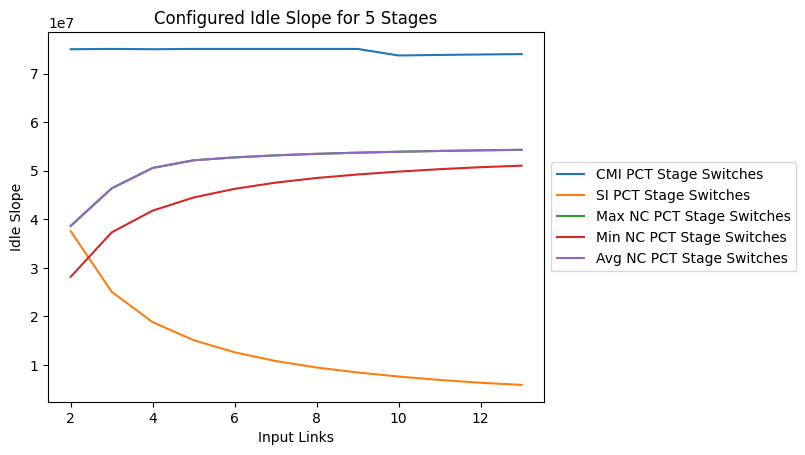

In [66]:
#For input Links and 5 Stages
stages = 5
fig, ax = plt.subplots()
exportResults = dict()
for isScheme in simMaxStageIdleSlopes:
    if isScheme == 'Static':
        continue
    ctScheme = 'PCT'
    slopes = dict()
    for key in simMaxStageIdleSlopes[isScheme][ctScheme]:
        if key[1] == stages:
            slopes[key[0]] = simMaxStageIdleSlopes[isScheme][ctScheme][key]
    slopes = dict(sorted(slopes.items()))
    name = isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
    if isScheme == "NC":
        name = "Max " + name
        exportResults["NC_Max"] = slopes
    else:
        exportResults[isScheme] = slopes
    ax.plot(slopes.keys(), slopes.values(), label=name)
    if isScheme == "NC":
        slopes = dict()
        for key in simMinStageIdleSlopes[isScheme][ctScheme]:
            if key[1] == stages:
                slopes[key[0]] = simMinStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Min " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        ax.plot(slopes.keys(), slopes.values(), label=name)
        exportResults["NC_Min"] = slopes
        slopes = dict()
        for key in simAvgStageIdleSlopes[isScheme][ctScheme]:
            if key[1] == stages:
                slopes[key[0]] = simAvgStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Avg " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        ax.plot(slopes.keys(), slopes.values(), label=name)
        exportResults["NC_Avg"] = slopes
ax.set_xlabel('Input Links')
ax.set_ylabel('Idle Slope')
ax.set_title('Configured Idle Slope for ' + str(stages) + ' Stages')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
exportIdleSlopeConfig(f"idleSlopeConfig{stages}Stages.csv", exportResults, stages)

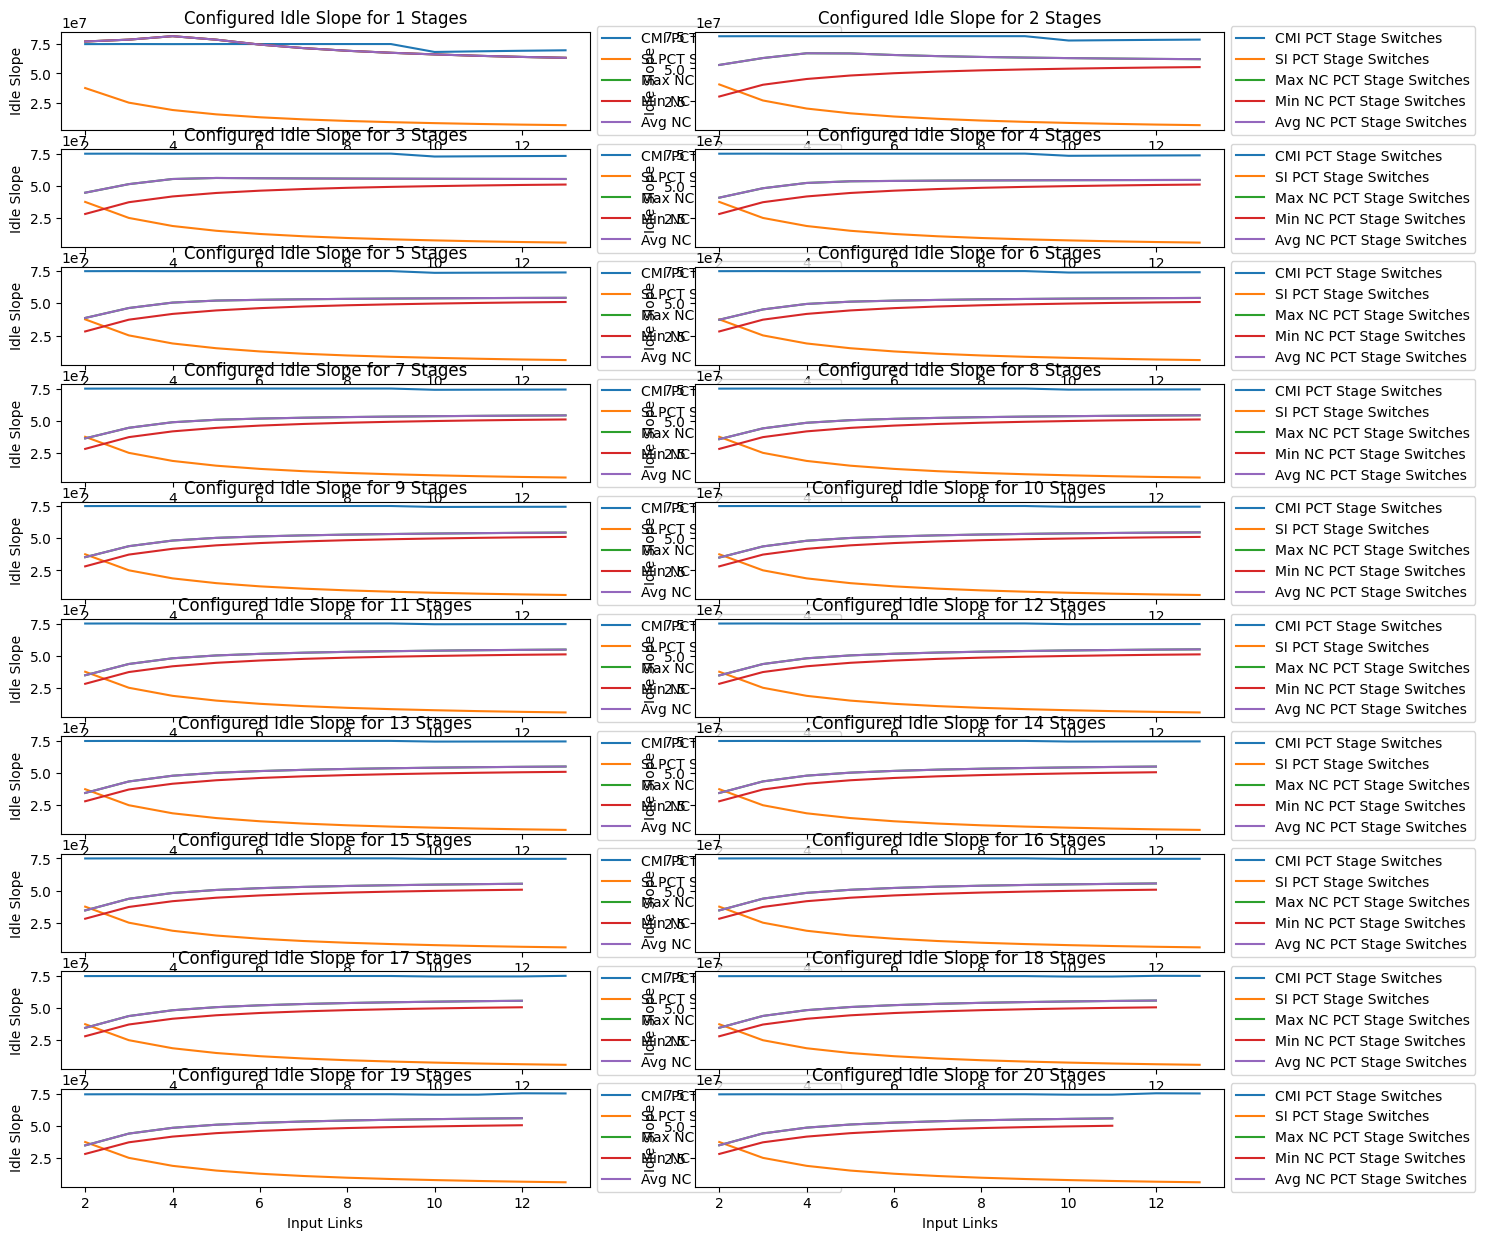

In [67]:
#For input Links and X Stages create a subplot for the 1 to 10 stages
fig, axs = plt.subplots(10, 2, figsize=(15, 15))
for i in range(1,21):
    ax = axs[floor((i-1)/2), (i-1)%2]
    for isScheme in simMaxStageIdleSlopes:
        if isScheme == 'Static':
            continue
        ctScheme = 'PCT'
        slopes = dict()
        for key in simMaxStageIdleSlopes[isScheme][ctScheme]:
            if key[1] == i:
                slopes[key[0]] = simMaxStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        if isScheme == "NC":
            name = "Max " + name
        ax.plot(slopes.keys(), slopes.values(), label=name)
        if isScheme == "NC":
            slopes = dict()
            for key in simMinStageIdleSlopes[isScheme][ctScheme]:
                if key[1] == i:
                    slopes[key[0]] = simMinStageIdleSlopes[isScheme][ctScheme][key]
            slopes = dict(sorted(slopes.items()))
            name = "Min " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
            ax.plot(slopes.keys(), slopes.values(), label=name)
            slopes = dict()
            for key in simAvgStageIdleSlopes[isScheme][ctScheme]:
                if key[1] == i:
                    slopes[key[0]] = simAvgStageIdleSlopes[isScheme][ctScheme][key]
            slopes = dict(sorted(slopes.items()))
            name = "Avg " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
            ax.plot(slopes.keys(), slopes.values(), label=name)
    ax.set_xlabel('Input Links')
    ax.set_ylabel('Idle Slope')
    ax.set_title('Configured Idle Slope for ' + str(i) + ' Stages')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

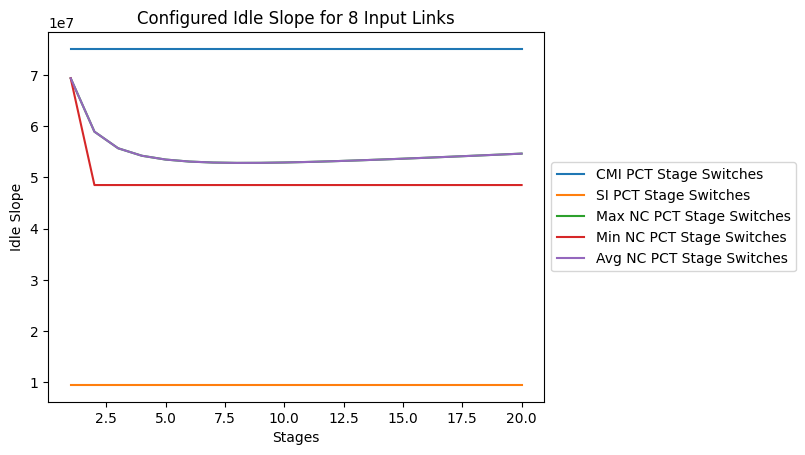

In [68]:
#For stages and 8 Input Links
inputLinks = 8
# plot the aggregate idle slopes from simAggregateIdleSlopes
fig, ax = plt.subplots()
# add the stage slopes
for isScheme in simMaxStageIdleSlopes:
    if isScheme == 'Static':
        continue
    ctScheme = 'PCT'
    slopes = dict()
    for key in simMaxStageIdleSlopes[isScheme][ctScheme]:
        if key[0] == inputLinks:
            slopes[key[1]] = simMaxStageIdleSlopes[isScheme][ctScheme][key]
    slopes = dict(sorted(slopes.items()))
    name = isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
    if isScheme == "NC":
        name = "Max " + name
    ax.plot(slopes.keys(), slopes.values(), label=name)
    if isScheme == "NC":
        slopes = dict()
        for key in simMinStageIdleSlopes[isScheme][ctScheme]:
            if key[0] == inputLinks:
                slopes[key[1]] = simMinStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Min " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        ax.plot(slopes.keys(), slopes.values(), label=name)
        slopes = dict()
        for key in simAvgStageIdleSlopes[isScheme][ctScheme]:
            if key[0] == inputLinks:
                slopes[key[1]] = simAvgStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Avg " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        ax.plot(slopes.keys(), slopes.values(), label=name)
ax.set_xlabel('Stages')
ax.set_ylabel('Idle Slope')
ax.set_title('Configured Idle Slope for ' + str(inputLinks) + ' Input Links')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


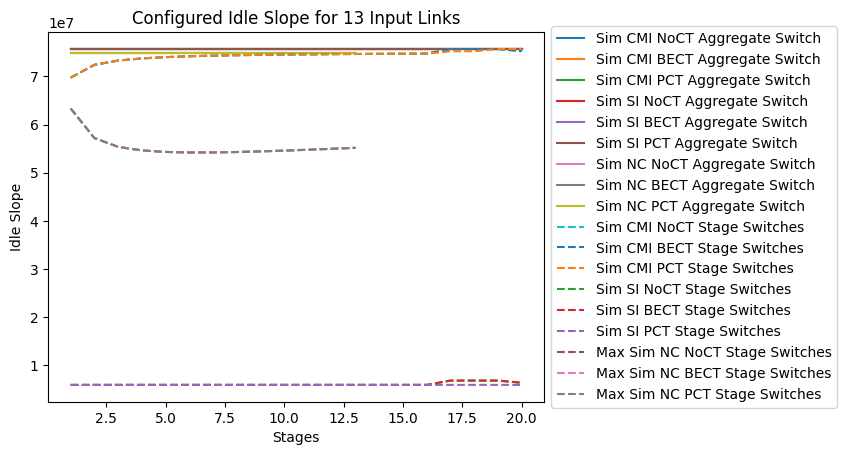

In [70]:
# for stages and 13 input links
inputLinks = 13
fig, ax = plt.subplots()
for isScheme in simAggregateIdleSlopes:
    if isScheme == 'Static':
        continue
    for ctScheme in simAggregateIdleSlopes[isScheme]:
        if ctScheme == "NoCT_NoPCTRes" or ctScheme == "BECT_NoPCTRes":
            continue
        slopes = dict()
        for key in simAggregateIdleSlopes[isScheme][ctScheme]:
            if key[0] == inputLinks:
                slopes[key[1]] = simAggregateIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Sim " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Aggregate Switch'
        ax.plot(slopes.keys(), slopes.values(), label=name)
# add the stage slopes
for isScheme in simMaxStageIdleSlopes:
    if isScheme == 'Static':
        continue
    for ctScheme in simMaxStageIdleSlopes[isScheme]:
        if ctScheme == "NoCT_NoPCTRes" or ctScheme == "BECT_NoPCTRes":
            continue
        slopes = dict()
        for key in simMaxStageIdleSlopes[isScheme][ctScheme]:
            if key[0] == inputLinks:
                slopes[key[1]] = simMaxStageIdleSlopes[isScheme][ctScheme][key]
        slopes = dict(sorted(slopes.items()))
        name = "Sim " + isScheme + ' ' + ctScheme.replace("_", " ") + ' Stage Switches'
        if isScheme == "NC":
            name = "Max " + name
        ax.plot(slopes.keys(), slopes.values(), label=name, linestyle='dashed')
ax.set_xlabel('Stages')
ax.set_ylabel('Idle Slope')
ax.set_title('Configured Idle Slope for ' + str(inputLinks) + ' Input Links')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
        

## Aggregate Delay Analysis

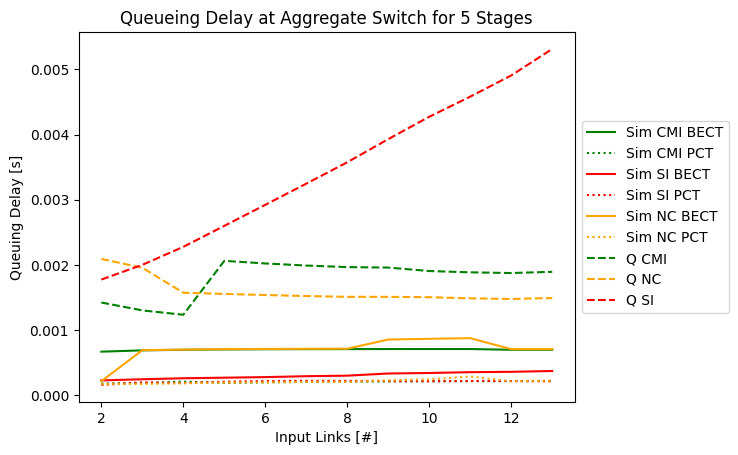

In [74]:
stages = 5
# plot the aggregate delays from simAggregateDelays
fig, ax = plt.subplots()
for isScheme in simAggregateDelays:
    if isScheme == 'Static':
        continue
    for ctScheme in simAggregateDelays[isScheme]:
        if "No" in ctScheme:
            continue
        delays = dict()
        for key in simAggregateDelays[isScheme][ctScheme]:
            if key[1] == stages:
                delays[key[0]] = simAggregateDelays[isScheme][ctScheme][key]
        delays = dict(sorted(delays.items()))
        name = "Sim " + isScheme + ' ' + ctScheme.replace("_", " ")
        line='solid'
        if "BE" not in ctScheme:
            line='dotted'
        ax.plot(delays.keys(), delays.values(), label=name, linestyle=line, color=colorForSchemes[isScheme])
# plot the aggregate delays from qAggregateDelays
for isScheme in qAggregateDelays:
    if isScheme == 'Static':
        continue
    ctScheme = 'PCT'
    # for ctScheme in qAggregateDelays[isScheme]:
    #     if "NoPCTRes" in ctScheme:
    #         continue
    delays = dict()
    for key in qAggregateDelays[isScheme][ctScheme]:
        if key[1] == stages:
            delays[key[0]] = qAggregateDelays[isScheme][ctScheme][key]
    delays = dict(sorted(delays.items()))
    name = "Q " + isScheme
    ax.plot(delays.keys(), delays.values(), label=name, linestyle='dashed', color=colorForSchemes[isScheme])
ax.set_xlabel('Input Links [#]')
ax.set_ylabel('Queuing Delay [s]')
ax.set_title('Queueing Delay at Aggregate Switch for ' + str(stages) + ' Stages')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [73]:
def exportAggregateDelayWithQ(file, exportResults , inputLinks):
    with open(file, "w") as f:
        f.write("numInputLinks,numStages")
        for key in exportResults:
            f.write("," + key)
        f.write("\n")
        for key in exportResults[list(exportResults.keys())[0]]:
            f.write(str(inputLinks) + "," + str(key))
            for scheme in exportResults:
                f.write("," + str(exportResults[scheme][key]))
            f.write("\n")

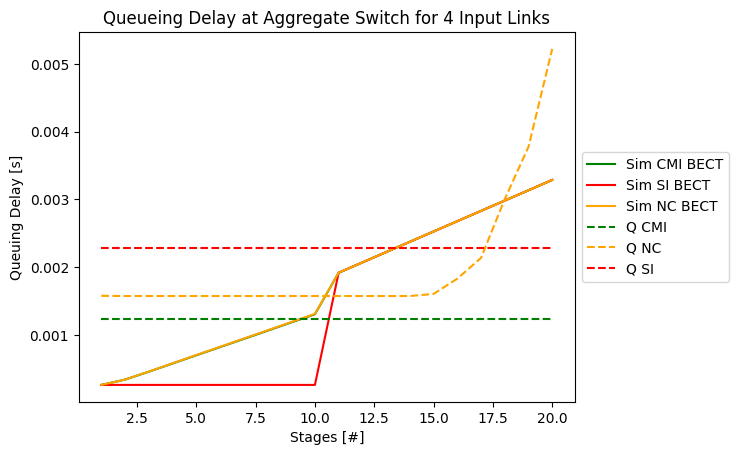

In [75]:
exportResults = dict()
# fig, axs = plt.subplots(12, 1, figsize=(10, 40), sharex=True)
fig, ax = plt.subplots()
inputLinks = 4
# for inputLinks in range(2, 14):
    # ax = axs[inputLinks-2]
for isScheme in simAggregateDelays:
    if isScheme == 'Static':
        continue
    # ctScheme = "BECT"
    for ctScheme in simAggregateDelays[isScheme]:
        if "No" in ctScheme or "PCT" in ctScheme:
            continue
        delays = dict()
        for key in simAggregateDelays[isScheme][ctScheme]:
            if key[0] == inputLinks:
                delays[key[1]] = simAggregateDelays[isScheme][ctScheme][key]
        delays = dict(sorted(delays.items()))
        name = "Sim " + isScheme + ' ' + ctScheme.replace("_", " ")
        line='solid'
        if "BE" not in ctScheme:
            line='dotted'
        exportResults["Sim_" + isScheme] = delays
        ax.plot(delays.keys(), delays.values(), label=name, linestyle=line, color=colorForSchemes[isScheme])
for isScheme in qAggregateDelays:
    if isScheme == 'Static':
        continue
    ctScheme = 'PCT'
    delays = dict()
    for key in qAggregateDelays[isScheme][ctScheme]:
        if key[0] == inputLinks:
            delays[key[1]] = qAggregateDelays[isScheme][ctScheme][key]
    delays = dict(sorted(delays.items()))
    name = "Q " + isScheme
    exportResults["Q_" + isScheme] = delays
    ax.plot(delays.keys(), delays.values(), label=name, linestyle='dashed', color=colorForSchemes[isScheme])
    ax.set_title('Queueing Delay at Aggregate Switch for ' + str(inputLinks) + ' Input Links')
ax.set_ylabel('Queuing Delay [s]')
# axs[11].set_xlabel('Stages [#]')
ax.set_xlabel('Stages [#]')
# axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(hspace=0)
plt.show()
exportAggregateDelayWithQ(f"aggregateDelayWithQ{inputLinks}IL.csv", exportResults , inputLinks)


## End 2 End Delays

In [76]:
def getDelayForStagesAndInputLinks(stages, inputLinks, data):
    delay = None
    if (inputLinks,stages) in data:
        delay = data[(inputLinks,stages)]
    return delay

def getDelaysForStage(stage, data):
    delays = dict()
    for key in data:
        if key[1] == stage:
            delay = getDelayForStagesAndInputLinks(stage, key[0], data)
            if delay is not None:
                delays[key[0]] = delay
    return delays

def getDelaysForInputLinks(inputLinks, data):
    delays = dict()
    for key in data:
        if key[0] == inputLinks:
            delay = getDelayForStagesAndInputLinks(key[1], inputLinks, data)
            if delay is not None:
                delays[key[1]] = delay
    return delays

def getDelaysForStudyAndInputLinks(isScheme, ctScheme, inputLinks, minS, maxS, data):
    delays = dict()
    if (isScheme in data) and (ctScheme in data[isScheme]):
        for key in data[isScheme][ctScheme]:
            if key[0] == inputLinks:
                if key[1] >= minS and key[1] <= maxS:
                    delay = getDelayForStagesAndInputLinks(key[1], inputLinks, data[isScheme][ctScheme])
                    if delay is not None:
                        delays[key[1]] = delay
    return delays

def getDelaysForStudyAndStage(isScheme, ctScheme, stage, minIL, maxIL, data):
    delays = dict()
    if (isScheme in data) and (ctScheme in data[isScheme]):
        for key in data[isScheme][ctScheme]:
            if key[1] == stage:
                if key[0] >= minIL and key[0] <= maxIL:
                    delay = getDelayForStagesAndInputLinks(stage, key[0], data[isScheme][ctScheme])
                    if delay is not None:
                        delays[key[0]] = delay
    return delays
    

In [77]:
dncStudiesForCtScheme = {
    "NoCT": ["Static", "CMI_NoCT", "SI_NoCT"],
    "NoCT_NoPCTRes": ["CMI_NoPCTRes", "SI_NoPCTRes"],
    "BECT": ["Static", "CMI_NoCT", "SI_NoCT"],
    "BECT_NoPCTRes": ["CMI_NoPCTRes", "SI_NoPCTRes"],
    "PCT": ["Static"],
}

def plotE2EDelayForInputLinks(ctScheme, IL, minS, maxS, data, ax, linestyle='solid'):
    for isScheme in data:
        if "Static" in isScheme:
            continue
        delays = getDelaysForStudyAndInputLinks(isScheme, ctScheme, IL, minS, maxS, data)
        if delays.__len__() == 0:
            continue
        delays = dict(sorted(delays.items()))
        name = isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle=linestyle)
    return ax

def plotE2EDelayForStages(ctScheme, S, minIl, maxIl, data, ax, linestyle='solid'):
    for isScheme in data:
        if "Static" in isScheme:
            continue
        delays = getDelaysForStudyAndStage(isScheme, ctScheme, S, minIl, maxIl, data)
        if delays.__len__() == 0:
            continue
        delays = dict(sorted(delays.items()))
        name = isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle=linestyle)
    return ax

def plotDNCE2EDelayForInputLinks(ctScheme, IL, minS, maxS, data, ax):
    for study in data:
        if "Static" in study:
            continue
        if study not in dncStudiesForCtScheme[ctScheme]:
            continue
        isScheme = study.split('_')[0]
        ct = '_'.join(study.split('_')[1:])
        delays = dict()
        for key in data[study]:
            if key[0] == IL:
                if key[1] >= minS and key[1] <= maxS:
                    delays[key[1]] = data[study][key]
        delays = dict(sorted(delays.items()))
        name = "DNC " + isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle='dashed')

def plotDNCE2EDelayForStages(ctScheme, S, minIl, maxIl, data, ax):
    for study in data:
        if "Static" in study:
            continue
        if study not in dncStudiesForCtScheme[ctScheme]:
            continue
        isScheme = study.split('_')[0]
        ct = '_'.join(study.split('_')[1:])
        delays = dict()
        for key in data[study]:
            if key[1] == S:
                if key[0] >= minIl and key[0] <= maxIl:
                    delays[key[0]] = data[study][key]
        delays = dict(sorted(delays.items()))
        name = "DNC " + isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle='dashed')

def plotDYRECTsnE2EDelayForInputLinks(ctScheme, IL, minS, maxS, ax):
    delays = dict()
    for key in ncWcDependentDelays[ctScheme]:
        if key[0] == IL:
            if key[1] >= minS and key[1] <= maxS:
                delays[key[1]] = ncWcDependentDelays[ctScheme][key]
    delays = dict(sorted(delays.items()))
    name = "DYRECTsn Reservation Dependent"
    ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes["NC"], linestyle='dotted')
    # delays = dict()
    # for key in ncWcIndependentDelays[ctScheme]:
    #     if key[0] == IL:
    #         if key[1] >= minS and key[1] <= maxS:
    #             delays[key[1]] = ncWcIndependentDelays[ctScheme][key]
    # delays = dict(sorted(delays.items()))
    # name = "DYRECTsn Reservation Independent"
    # ax.plot(delays.keys(), delays.values(), label=name, color="purple", linestyle='dotted')

def plotDYRECTsnE2EDelayForStages(ctScheme, S, minIl, maxIl, ax):
    #ncWcDependentDelays
    delays = dict()
    for key in ncWcDependentDelays[ctScheme]:
        if key[1] == S:
            if key[0] >= minIl and key[0] <= maxIl:
                delays[key[0]] = ncWcDependentDelays[ctScheme][key]
    delays = dict(sorted(delays.items()))
    name = "DYRECTsn Reservation Dependent"
    ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes["NC"], linestyle='dotted')
    # delays = dict()
    # for key in ncWcIndependentDelays[ctScheme]:
    #     if key[1] == S:
    #         if key[0] >= minIl and key[0] <= maxIl:
    #             delays[key[0]] = ncWcIndependentDelays[ctScheme][key]
    # delays = dict(sorted(delays.items()))
    # name = "DYRECTsn Reservation Independent"
    # ax.plot(delays.keys(), delays.values(), label=name, color="purple", linestyle='dotted')

def plotQE2EDelayForInputLinks(S, IL, minS, maxS, ax):
    for isScheme in qE2EDelays:
        if "Static" in isScheme:
            continue
        delays = dict()
        for key in qE2EDelays[isScheme]:
            if key[1] == S:
                if key[0] >= minS and key[0] <= maxS:
                    delays[key[0]] = qE2EDelays[isScheme][key]
        delays = dict(sorted(delays.items()))
        name = "Q " + isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle='dashed')

def plotQE2EDelayForStages(ctScheme, S, minIl, maxIl, data, ax):
    for isScheme in qE2EDelays:
        if "Static" in isScheme:
            continue
        delays = dict()
        for key in qE2EDelays[isScheme]:
            if key[1] == S:
                if key[0] >= minIl and key[0] <= maxIl:
                    delays[key[0]] = qE2EDelays[isScheme][key]
        delays = dict(sorted(delays.items()))
        name = "Q " + isScheme
        ax.plot(delays.keys(), delays.values(), label=name, color=colorForSchemes[isScheme], linestyle='dashed')

In [78]:
ctSchemes = list()
for isScheme in simSinkDelays:
    for ctScheme in simSinkDelays[isScheme]:
        if ctScheme not in ctSchemes:
            ctSchemes.append(ctScheme)

End-to-End Delay for dependent on number of input links NoCT


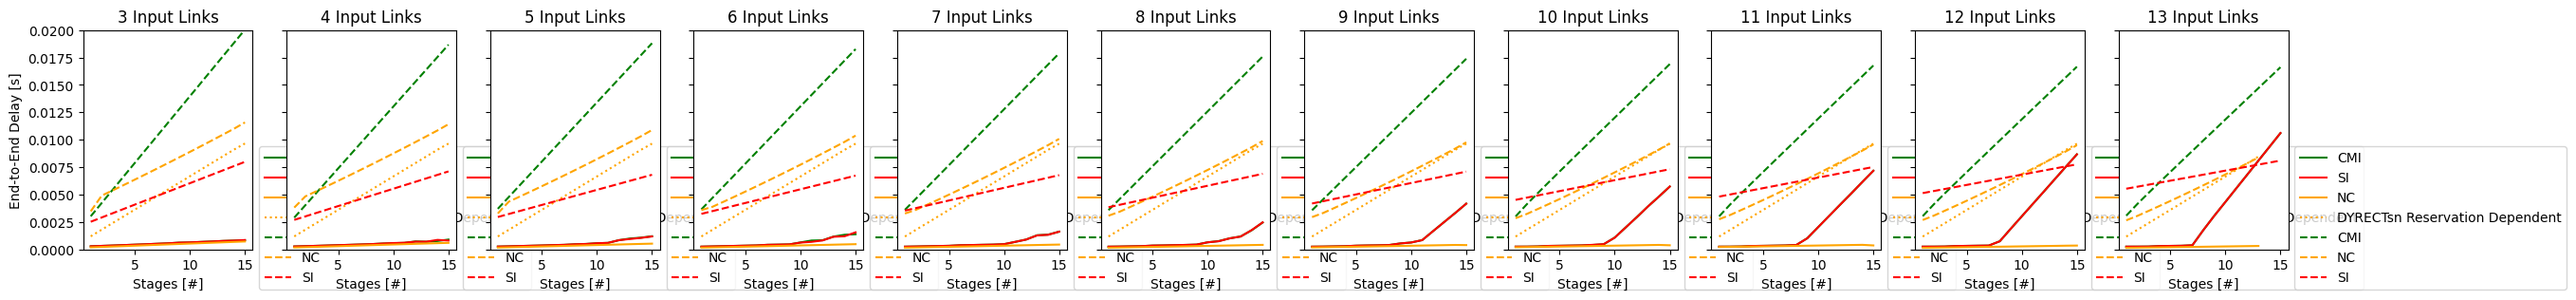

End-to-End Delay for dependent on number of input links BECT


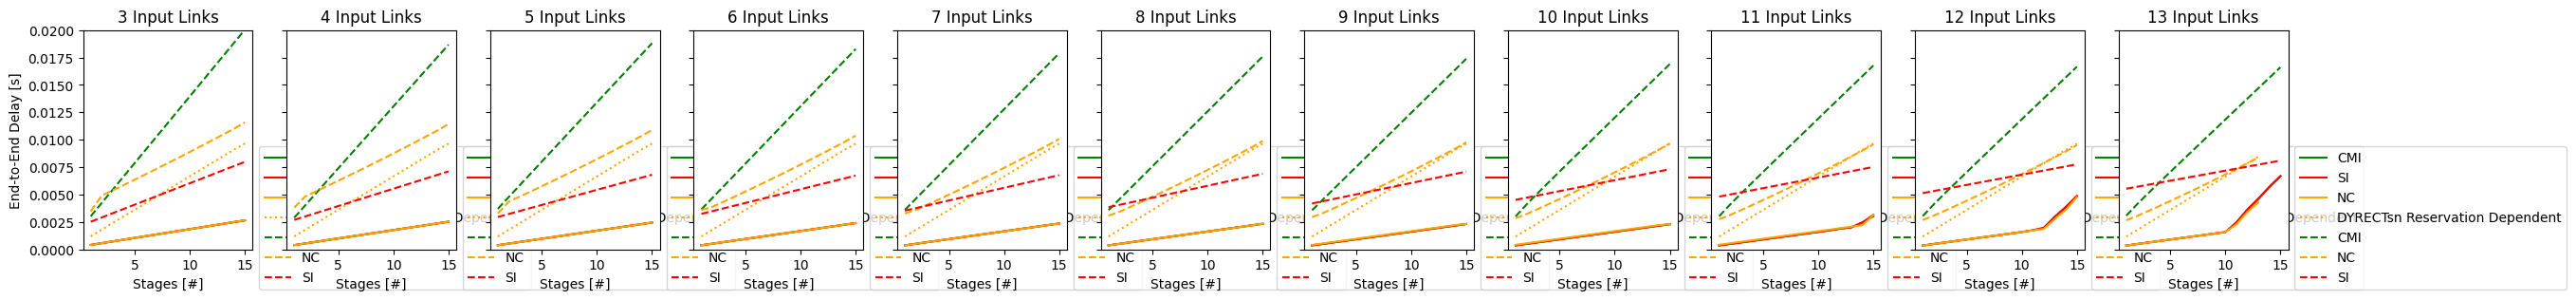

End-to-End Delay for dependent on number of input links PCT


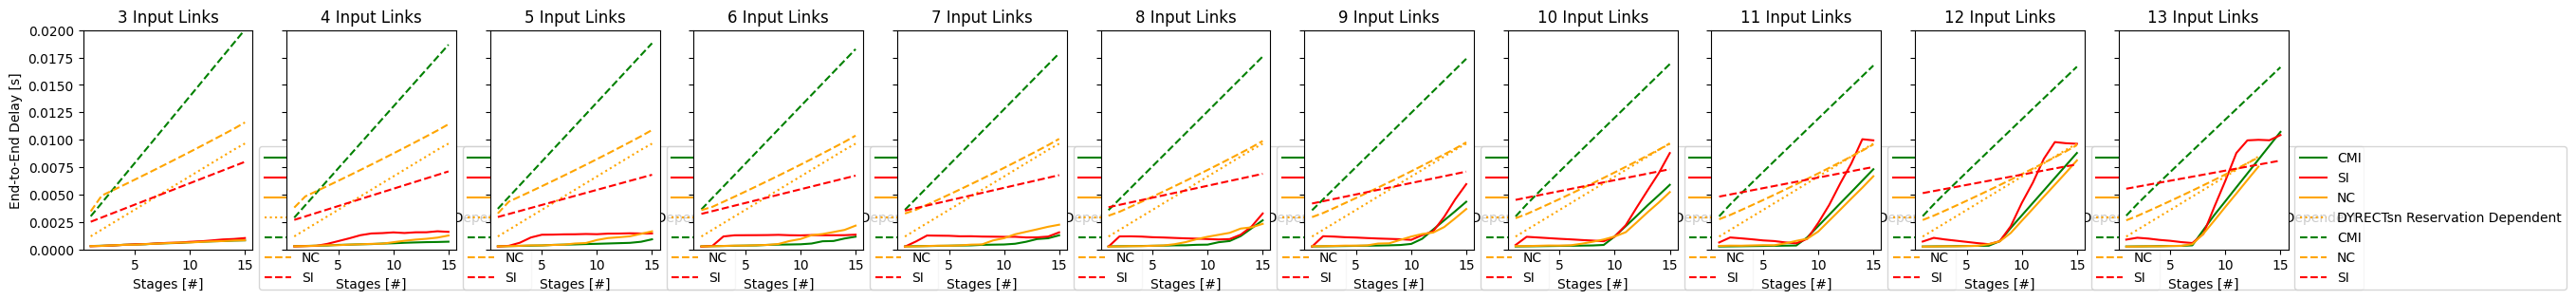

In [82]:
# create 13 small subplots for each ct scheme and input links from 1 to 13
for ctScheme in ctSchemes:
    if "NoPCTRes" in ctScheme:
        continue
    print("End-to-End Delay for dependent on number of input links " + ctScheme)
    # share a y axis 
    fig, axs = plt.subplots(1, 11, figsize=(30, 3), sharey=True)
    for IL in range(3,14):
        ax = axs[IL-3]
        plotE2EDelayForInputLinks(ctScheme, IL, 1, 15, simSinkDelays, ax)
        # plotDNCE2EDelayForInputLinks("NoCT", IL, 1, 10, dncAggregateDelays, ax)
        plotDYRECTsnE2EDelayForInputLinks("PCTRes", IL, 1, 15, ax)
        plotE2EDelayForInputLinks(ctScheme, IL, 1, 15, qE2EDelays, ax, linestyle='dashed')        
        title = str(IL) + " Input Links"
        ax.set_xlabel('Stages [#]')
        ax.set_title(title)
        ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
        ax.set_ylim(0, 0.02)
    axs[0].set_ylabel('End-to-End Delay [s]')
    plt.show()    

End-to-End Delay for dependent on number of stages NoCT


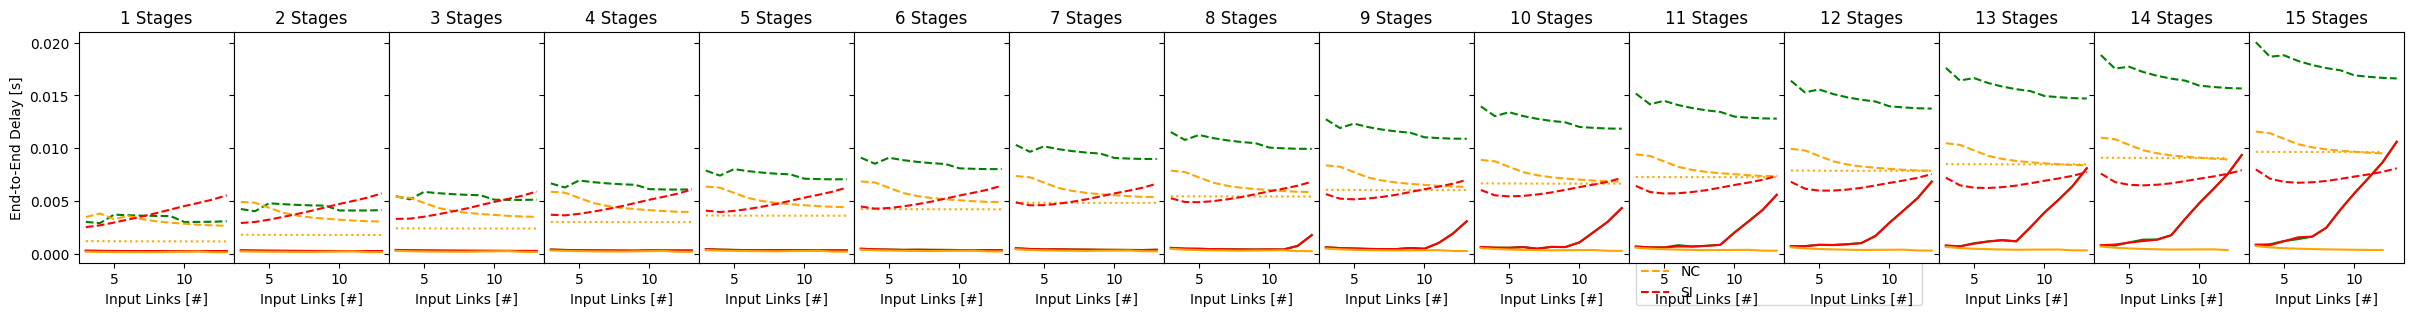

End-to-End Delay for dependent on number of stages BECT


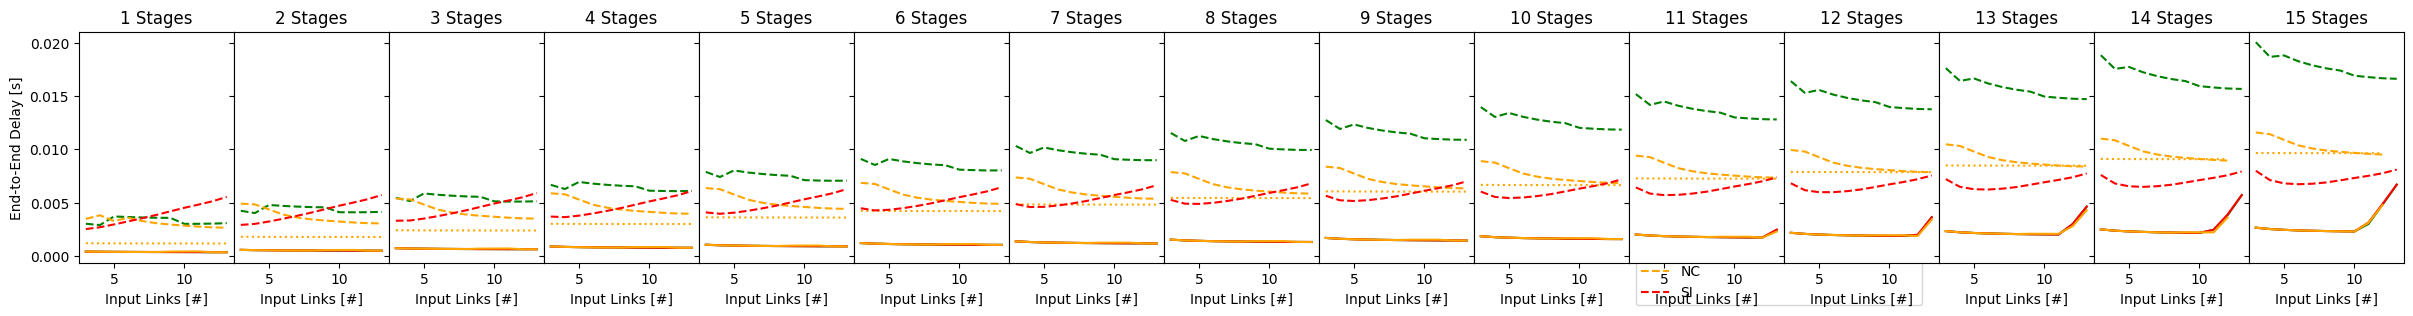

End-to-End Delay for dependent on number of stages PCT


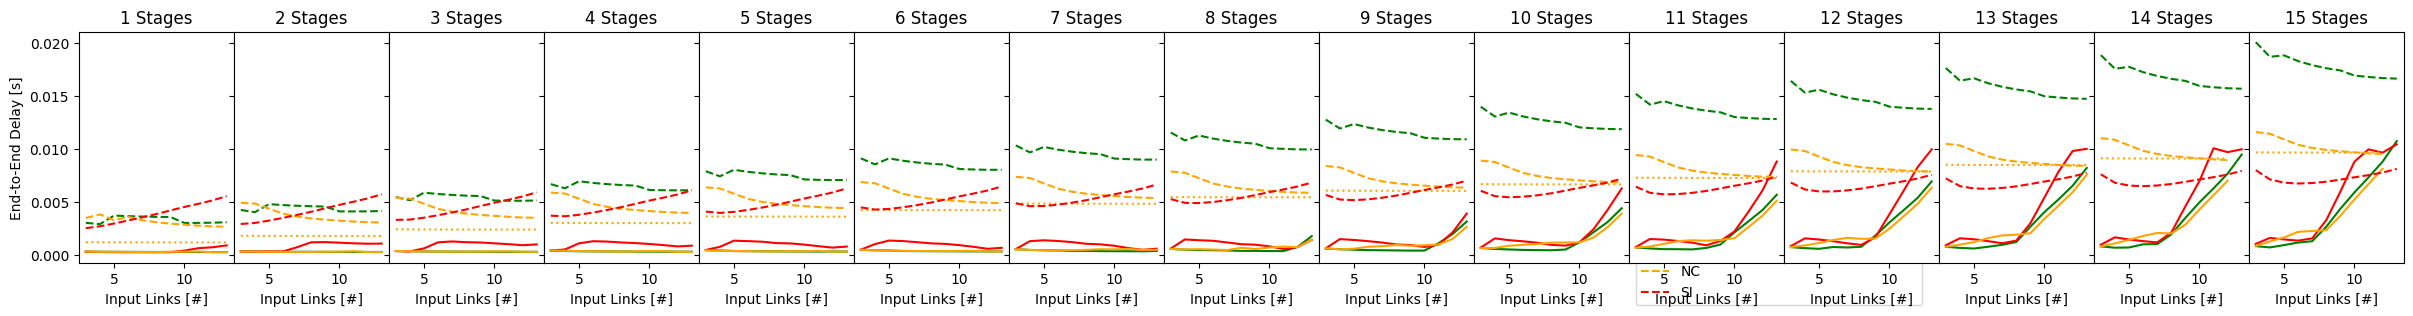

In [84]:
for ctScheme in ctSchemes:
    if "NoPCTRes" in ctScheme:
        continue
    print("End-to-End Delay for dependent on number of stages " + ctScheme)
    # share a y axis
    fig, axs = plt.subplots(1, 15, figsize=(30, 3), sharey=True)
    for S in range(1,16):
        ax = axs[S-1]
        plotE2EDelayForStages(ctScheme, S, 3, 13, simSinkDelays, ax)
        # plotDNCE2EDelayForStages("NoCT", S, 3, 13, dncAggregateDelays, ax)
        plotDYRECTsnE2EDelayForStages("PCTRes", S, 3, 13, ax)
        plotE2EDelayForStages(ctScheme, S, 3, 13, qE2EDelays, ax, linestyle='dashed')
        title = str(S) + " Stages"
        ax.set_xlabel('Input Links [#]')
        ax.set_title(title)
    axs[9].legend(loc='upper left', bbox_to_anchor=(1, 0.5))
    axs[0].set_ylabel('End-to-End Delay [s]')
    #remove gap between subplots
    plt.subplots_adjust(wspace=0)
    plt.show()

## Plot Setup Time

(10, 1) 0.00108018
(11, 1) 0.0011193800000000032
(12, 1) 0.0011357700000000082
(13, 1) 0.0011522600000000022
(2, 1) 0.0008222600000000052
(3, 1) 0.0008664899999999975
(4, 1) 0.0008851400000000065
(5, 1) 0.0009165800000000002
(6, 1) 0.0009480200000000077
(7, 1) 0.0010058599999999973
(8, 1) 0.0010116200000000047
(9, 1) 0.001027940000000005


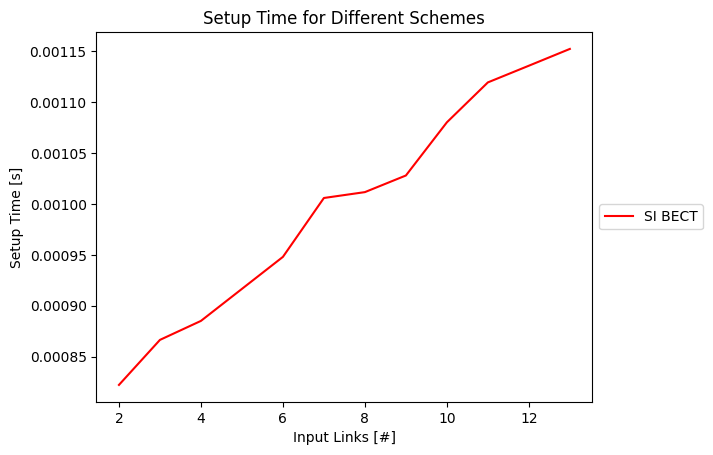

In [104]:
# plot the setup times in simSetupTime
fig, ax = plt.subplots()
for stages in range(1,2):
    isScheme = "SI"
    ctScheme = "BECT"
    setupTimes = dict()
    for key in simSetupTime[isScheme][ctScheme]:
        if key[1] == stages:
            print(str(key) + " " + str(simSetupTime[isScheme][ctScheme][key]))
            setupTimes[key[0]] = simSetupTime[isScheme][ctScheme][key]
    setupTimes = dict(sorted(setupTimes.items()))
    name = isScheme + ' ' + ctScheme.replace("_", " ")
    ax.plot(setupTimes.keys(), setupTimes.values(), label=name, color=colorForSchemes[isScheme])
ax.set_xlabel('Input Links [#]')
ax.set_ylabel('Setup Time [s]')
ax.set_title('Setup Time for Different Schemes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [112]:
# export the simSetupTime for the SI_BECT scheme
with open("setupTimeSI_BECT.csv", "w") as f:
    f.write("numInputLinks,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15\n")
    for il in range(2,14):
        line = str(il)
        for s in range(1,16):
            line += "," + str(simSetupTime["SI"]["BECT"][(il,s)])
        f.write(line + "\n")

# Export DNC Configuration for Study

In [253]:
exportFile = "MaxDelayStudyConfigurations.java"
# export a java class with static getter methods for the data from simAggregateIdleSlopes, simIdleSlopesStages
with open(exportFile, 'w') as file:
    file.write("/**\n")
    file.write(" * This file was generated by a script.\n")
    file.write(" * It contains the lookup tables for the idle slopes of the aggregate and stage switches\n")
    file.write(" * from the simulation and the NC tool for calculation in DNC tool.\n")
    file.write(" */\n")
    file.write("package org.networkcalculus.dnc.demos;\n")
    file.write("\n")
    file.write("import org.apache.commons.math3.util.Pair;\n")
    file.write("import java.util.HashMap;\n")
    file.write("import java.util.Map;\n")
    file.write("\n")
    file.write("public class MaxDelayStudyConfigurations {\n")
    # stage idle slopes data structure
    file.write("    public Map<String, Map<Pair<Integer, Integer>, Integer>> simAggregateIdleSlopes;\n")
    file.write("    public Map<String, Map<Pair<Integer, Integer>, Integer>> simMaxStageIdleSlopes;\n")
    file.write("    public Map<String, Map<Pair<Integer, Integer>, Map<Integer, Integer>> simNCStageIdleSlopes;\n")
    file.write("\n")
    file.write("    public MaxDelayStudyConfigurations() {\n")
    file.write("        initializeSimStageIdleSlope();\n")
    file.write("        initializeSimAggregateIdleSlope();\n")
    file.write("        initializeNCSimStageIdleSlope();\n")
    file.write("    }\n")
    file.write("\n")
    file.write("    private void initializeSimAggregateIdleSlope() {\n")
    file.write("        simAggregateIdleSlopes = new HashMap<>();\n")
    for isScheme in simAggregateIdleSlopes:
        for ctScheme in simAggregateIdleSlopes[isScheme]:
            file.write("        initializeSimAggregateIdleSlope_" + isScheme + "_" + ctScheme + "();\n")
    file.write("    }\n")
    file.write("\n")
    for isScheme in simAggregateIdleSlopes:
        for ctScheme in simAggregateIdleSlopes[isScheme]:
            file.write("    private void initializeSimAggregateIdleSlope_" + isScheme + "_" + ctScheme + "() {\n")
            file.write("        simAggregateIdleSlopes.put(\"" + isScheme + "_" + ctScheme + "\", new HashMap<>());\n")
            for key in simAggregateIdleSlopes[isScheme][ctScheme]:
                file.write("        simAggregateIdleSlopes.get(\"" + isScheme + "_" + ctScheme + "\").put(new Pair<>(" + str(key[0]) + ", " + str(key[1]) + "), " + str(simAggregateIdleSlopes[isScheme][ctScheme][key]) + ");\n")
            file.write("    }\n")
            file.write("\n")  
    file.write("    private void initializeSimStageIdleSlope() {\n")
    file.write("        simMaxStageIdleSlopes = new HashMap<>();\n")
    for isScheme in simMaxStageIdleSlopes:
        for ctScheme in simMaxStageIdleSlopes[isScheme]:
            file.write("        initializeSimStageIdleSlope_" + isScheme + "_" + ctScheme + "();\n")
    file.write("    }\n")
    file.write("\n")
    for isScheme in simMaxStageIdleSlopes:
        if isScheme == 'NC':
            continue
        for ctScheme in simMaxStageIdleSlopes[isScheme]:
            file.write("    private void initializeSimStageIdleSlope_" + isScheme + "_" + ctScheme + "() {\n")
            file.write("        simMaxStageIdleSlopes.put(\"" + isScheme + "_" + ctScheme + "\", new HashMap<>());\n")
            for key in simMaxStageIdleSlopes[isScheme][ctScheme]:
                file.write("        simMaxStageIdleSlopes.get(\"" + isScheme + "_" + ctScheme + "\").put(new Pair<>(" + str(key[0]) + ", " + str(key[1]) + "), " + str(simMaxStageIdleSlopes[isScheme][ctScheme][key]) + ");\n")
            file.write("    }\n")
            file.write("\n")       
    ## special treatment for NC
    file.write("    private void initializeNCSimStageIdleSlope() {\n")
    file.write("        simNCStageIdleSlopes = new HashMap<>();\n")
    for ctScheme in simNcStageIdleSlopes["NC"]:
        file.write("        initializeNCSimStageIdleSlope_" + ctScheme + "();\n")
    file.write("    }\n")
    file.write("\n")
    for ctScheme in simNcStageIdleSlopes["NC"]:
        file.write("    private void initializeNCSimStageIdleSlope_" + ctScheme + "() {\n")
        file.write("        simNCStageIdleSlopes.put(\"" + isScheme + "_" + ctScheme + "\", new HashMap<>());\n")
        for key in simNcStageIdleSlopes["NC"][ctScheme]:
            file.write("        initializeNCSimStageIdleSlope_" + ctScheme + "_IL_" + str(key[0]) + "_S_" + str(key[1]) + "();\n")
        file.write("    }\n")
        file.write("\n")
    for ctScheme in simNcStageIdleSlopes["NC"]:
        for key in simNcStageIdleSlopes["NC"][ctScheme]:
            file.write("    private void initializeNCSimStageIdleSlope_" + ctScheme + "_IL_" + str(key[0]) + "_S_" + str(key[1]) + "() {\n")
            file.write("        simNCStageIdleSlopes.get(\"" + isScheme + "_" + ctScheme + "\").put(new Pair<>(" + str(key[0]) + ", " + str(key[1]) + "), new HashMap<>());\n")
            for stage in simNcStageIdleSlopes["NC"][ctScheme][key]:
                file.write("        simNCStageIdleSlopes.get(\"" + isScheme + "_" + ctScheme + "\").get(new Pair<>(" + str(key[0]) + ", " + str(key[1]) + ")).put(" + str(stage) + ", " + str(simNcStageIdleSlopes["NC"][ctScheme][key][stage]) + ");\n")
            file.write("    }\n")
            file.write("\n")
    # getter methods
    file.write("    public int getSimStageIdleSlope(String study, int inputLinks, int stages) {\n")
    file.write("        return simMaxStageIdleSlopes.get(study).get(new Pair<>(inputLinks, stages));\n")
    file.write("    }\n")
    file.write("\n")
    file.write("    public int getSimAggregateIdleSlope(String study, int inputLinks, int stages) {\n")
    file.write("        return simAggregateIdleSlopes.get(study).get(new Pair<>(inputLinks, stages));\n")
    file.write("    }\n")
    file.write("\n")
    file.write("    public int getNCSimStageIdleSlope(String study, int inputLinks, int stages, int currentStage) {\n")
    file.write("        return simNCStageIdleSlopes.get(study).get(new Pair<>(inputLinks, stages)).get(currentStage);\n")
    file.write("    }\n")
    file.write("\n")
    file.write("    public boolean existsSimScenario(String study, int inputLinks, int stages) {\n")
    file.write("        if (!(simNCStageIdleSlopes.containsKey(study) && simNCStageIdleSlopes.get(study).containsKey(new Pair<>(inputLinks, stages)))\n")
    file.write("            && !(simMaxStageIdleSlopes.containsKey(study) && simMaxStageIdleSlopes.get(study).containsKey(new Pair<>(inputLinks, stages)))) {\n")
    file.write("            return false;\n")
    file.write("        }\n")
    file.write("        return simAggregateIdleSlopes.containsKey(study) && simAggregateIdleSlopes.get(study).containsKey(new Pair<>(inputLinks, stages));\n")
    file.write("    }\n")


    # main test method
    file.write("    public static void main(String[] args) {\n")
    file.write("        MaxDelayStudyConfigurations config = new MaxDelayStudyConfigurations();\n")
    file.write("        System.out.println(config.existsSimScenario(\"Static_NoCT\", 13, 8) + \" should be true\");\n")
    file.write("        System.out.println(config.existsSimScenario(\"NC_PCT\", 9, 4) + \" should be true\");\n")
    file.write("        System.out.println(config.existsSimScenario(\"Should_Not_Exist\", 13, 8) + \" should be false\");\n")
    file.write("        System.out.println(config.getSimStageIdleSlope(\"Static_NoCT\", 13, 8) + \" should be 75000000\");\n")
    file.write("        System.out.println(config.getSimAggregateIdleSlope(\"Static_NoCT\", 13, 8) + \" should be 75000000\");\n")
    file.write("        System.out.println(config.getNCSimStageIdleSlope(\"NC_PCT\", 9, 4, 1) + \" should be 50579485\");\n")
    file.write("    }\n")
    file.write("}\n")
    file.write("\n")


# Sim Par Generation

In [28]:
totalBandwidth = 75000000
linkrate = 100000000
talkerInterval = 0.000125
ctInterval = 0.1
talkerSize = floor(((totalBandwidth / 8) * talkerInterval)/3)
talkerSizeAsStr = "floor(((" + str(totalBandwidth) + " / 8) * " + str(talkerInterval) + ") / ${IL})"
print("talkerSize " + talkerSizeAsStr)
ctSize = floor(((totalBandwidth / 8) * talkerInterval) - (((totalBandwidth / 8) * talkerInterval) / 3))
ctSizeAsStr = "floor(((" + str(totalBandwidth) + " / 8) * " + str(talkerInterval) + ") - (((" + str(totalBandwidth) + " / 8) * " + str(talkerInterval) + ") / ${IL}))"
print("ctSize " + ctSizeAsStr)
idleslope = (talkerSize*8 / talkerInterval) + (ctSize*8 / ctInterval)
idleslopeAsStr = "((" + talkerSizeAsStr + " * 8 / " + str(talkerInterval) + ") + (" + ctSizeAsStr + " * 8 / " + str(ctInterval) + "))"
print("idleslope " + idleslopeAsStr)
sendslope = (linkrate - idleslope) / linkrate
sendslopeAsStr = "(" + str(linkrate) + " - " + idleslopeAsStr + ") / " + str(linkrate)
print("sendslope " + sendslopeAsStr)
delay = (((ctSize * 8) * sendslope) / idleslope)
delayAsStr = "(((" + ctSizeAsStr + " * 8) * " + sendslopeAsStr + ") / " + idleslopeAsStr + ")"
print("delay " + delayAsStr)
delay

talkerSize floor(((75000000 / 8) * 0.000125) / ${IL})
ctSize floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL}))
idleslope ((floor(((75000000 / 8) * 0.000125) / ${IL}) * 8 / 0.000125) + (floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL})) * 8 / 0.1))
sendslope (100000000 - ((floor(((75000000 / 8) * 0.000125) / ${IL}) * 8 / 0.000125) + (floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL})) * 8 / 0.1))) / 100000000
delay (((floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL})) * 8) * (100000000 - ((floor(((75000000 / 8) * 0.000125) / ${IL}) * 8 / 0.000125) + (floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL})) * 8 / 0.1))) / 100000000) / ((floor(((75000000 / 8) * 0.000125) / ${IL}) * 8 / 0.000125) + (floor(((75000000 / 8) * 0.000125) - (((75000000 / 8) * 0.000125) / ${IL})) * 8 / 0.1)))


0.0001872154738299321